## Load Final Full Dataset with Feature Creation (2019) 
   
Dataset 1: BSS Usage/Movements data
   
Dataset 2: Master Data BiciMAD Bike Stations
   
Dataset 3: Weather Data
   
Dataset 4: Working Calendar data
   
   
Result Dataset: Full Dataset for Known user's usage with feature creation

In [1]:
#import libraries
import time
import math
import logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

### Support Functions

In [33]:
# Support function to be able to create multiple pairewise heatmaps YlOrRd
def plot_heatmap_age(df, x_col_name, y_col_name,plot_title,font_plot = 18, min_value=None, max_value=None):
    # Set font size to be further exported for the paper
    plt.rcParams.update({'font.size': font_plot})
    plot_title = str(plot_title)
    sns.set(style='whitegrid', font_scale=1.2)
    heatmap_data = df.pivot_table(values=y_col_name, index=x_col_name, aggfunc=np.mean)
    sns.heatmap(heatmap_data, cmap='Blues',vmin=min_value, vmax=max_value)
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(plot_title)
    # Save the plot to a PDF file
    plt.savefig(f'{plot_title}.pdf', format='pdf', bbox_inches='tight')
    plt.show()

In [11]:
# Load files
full_dataset = "add_path_merged_dataset_with_feat"

bike_full_df = pd.read_csv(full_dataset, header = 0, sep = ';')

In [12]:
print(bike_full_df.shape)
bike_full_df.head()

(2035394, 43)


,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,temp_unplug_hourTime,year,month,day,hour,travel_time_min,travel_revenue,id_weather,80,81,82,83,86,87,88,89,date,week_day,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc,day_of_week,unplug_station_tot_bases,idunplug_latitude,idunplug_longitude,plug_station_tot_bases,idplug_latitude,idplug_longitude,mh_distance_meters,time_group,unique_user_day_code,tot_trips_day
0,5c4b07ea2f38432e007daaba,a18550d468153bb8e1808d4f0a85955579951832772996...,10,1,1,415,133,5,36,2019-01-01T00:00:00.000+0100,28005,2019-01-01 00:00:00+01:00,2019,1,1,0,6.916667,0.5,24,6.0,0.69,22.0,4.4,67.0,957.0,101.0,0.0,2019-01-01,tuesday,holiday,national_holiday,Año Nuevo,1,24,40.403408,-3.710811,18,40.415010,-3.706103,1760.389172,0,a18550d468153bb8e1808d4f0a85955579951832772996...,1
1,5c4b07ea2f38432e007daabd,5922b4a1a2591161ebf1ad66f42f52cc7796f3754c2c76...,18,1,6,417,105,3,155,2019-01-01T00:00:00.000+0100,28009,2019-01-01 00:00:00+01:00,2019,1,1,0,6.950000,0.5,24,6.0,0.69,22.0,4.4,67.0,957.0,101.0,0.0,2019-01-01,tuesday,holiday,national_holiday,Año Nuevo,1,24,40.424846,-3.673863,18,40.444226,-3.678717,2641.794256,0,5922b4a1a2591161ebf1ad66f42f52cc7796f3754c2c76...,1
2,5c4b07ea2f38432e007daabe,ed1c1a22c120e7d42cc522c33ab41db549791f3914b273...,4,1,12,448,51,4,44,2019-01-01T00:00:00.000+0100,28005,2019-01-01 00:00:00+01:00,2019,1,1,0,7.466667,0.5,24,6.0,0.69,22.0,4.4,67.0,957.0,101.0,0.0,2019-01-01,tuesday,holiday,national_holiday,Año Nuevo,1,24,40.404785,-3.702827,24,40.413885,-3.704941,1221.373443,0,ed1c1a22c120e7d42cc522c33ab41db549791f3914b273...,1
3,5c4b07ea2f38432e007daac2,b70eb1a71e53c6351b4835f618a459886e2045a44635e4...,17,1,11,468,100,5,171,2019-01-01T00:00:00.000+0100,28028,2019-01-01 00:00:00+01:00,2019,1,1,0,7.800000,0.5,24,6.0,0.69,22.0,4.4,67.0,957.0,101.0,0.0,2019-01-01,tuesday,holiday,national_holiday,Año Nuevo,1,24,40.422658,-3.687055,24,40.429887,-3.671282,2405.058377,0,b70eb1a71e53c6351b4835f618a459886e2045a44635e4...,1
4,5c4b07ea2f38432e007daac4,1ad9b018315170d824bb396889046eaeff8ce0a0be46b3...,13,1,2,149,67,4,65,2019-01-01T00:00:00.000+0100,28009,2019-01-01 00:00:00+01:00,2019,1,1,0,2.483333,0.5,24,6.0,0.69,22.0,4.4,67.0,957.0,101.0,0.0,2019-01-01,tuesday,holiday,national_holiday,Año Nuevo,1,24,40.417924,-3.670896,24,40.421398,-3.675204,821.854857,0,1ad9b018315170d824bb396889046eaeff8ce0a0be46b3...,1


In [13]:
# Keeping Only target AgeGroups
bike_full_df = bike_full_df[bike_full_df['ageRange'].isin([3,4,5])]

In [14]:
# Train, test split stratify based on ageRange
bike_full_df, bike_full_df_test = train_test_split(bike_full_df, stratify=bike_full_df["ageRange"],test_size=0.20, random_state=123)

## EDA Bike Trip production per Age Group

In [24]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
bike_full_df.describe()

,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,year,month,day,hour,travel_time_min,travel_revenue,id_weather,80,81,82,83,86,87,88,89,day_of_week,unplug_station_tot_bases,idunplug_latitude,idunplug_longitude,plug_station_tot_bases,idplug_latitude,idplug_longitude,mh_distance_meters,time_group,tot_trips_day
count,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,645498.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000,1524367.000
mean,12.176,1.000,12.101,700.372,94.633,4.277,94.353,2019.000,6.462,15.338,13.574,11.673,0.499,24.000,18.737,1.810,191.447,15.373,54.411,944.354,209.969,0.460,2.643,23.946,40.422,-3.695,23.964,40.422,-3.695,2716.789,2.190,2.176
std,7.880,0.019,7.795,338.870,55.205,0.625,55.159,0.000,3.359,8.781,5.478,5.648,0.039,0.000,13.621,0.881,98.686,7.013,18.650,5.967,98.796,2.137,1.858,1.870,0.014,0.013,1.857,0.014,0.013,1432.880,1.176,1.311
min,1.000,1.000,1.000,1.000,1.000,3.000,1.000,2019.000,1.000,1.000,0.000,0.017,0.000,24.000,0.000,0.540,1.000,1.000,23.000,922.000,2.000,0.000,0.000,12.000,40.391,-3.725,12.000,40.391,-3.725,0.000,0.000,1.000
25%,5.000,1.000,5.000,444.000,49.000,4.000,49.000,2019.000,4.000,8.000,9.000,7.400,0.500,24.000,7.000,1.140,116.000,9.400,39.000,941.000,124.000,0.000,1.000,24.000,40.411,-3.704,24.000,40.411,-3.704,1650.037,1.000,1.000
50%,12.000,1.000,12.000,641.000,90.000,4.000,89.000,2019.000,6.000,15.000,14.000,10.683,0.500,24.000,17.000,1.540,213.000,15.300,53.000,944.000,210.000,0.000,3.000,24.000,40.422,-3.696,24.000,40.422,-3.697,2478.901,2.000,2.000
75%,20.000,1.000,19.000,901.000,141.000,5.000,139.000,2019.000,9.000,23.000,18.000,15.017,0.500,24.000,27.000,2.300,254.000,20.800,69.000,947.000,297.000,0.000,4.000,24.000,40.430,-3.686,24.000,40.430,-3.687,3544.851,3.000,3.000
max,30.000,2.000,30.000,1800.000,219.000,5.000,219.000,2019.000,12.000,31.000,23.000,30.000,2.000,24.000,50.000,5.840,359.000,29.200,99.000,959.000,374.000,30.800,6.000,30.000,40.466,-3.656,30.000,40.466,-3.656,9982.445,4.000,20.000


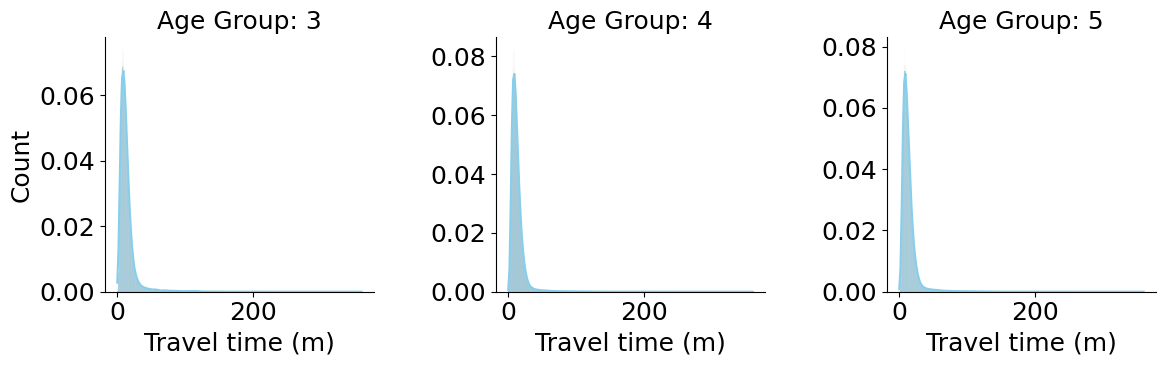

In [9]:
"""
User ageRange values: {3:[19:26]; 4:[27:40]; 5:[41:65]}
"""
# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 18})

# Display most popular hours of the day re-scaled to better appreciate each group distribution
popular_hours = bike_full_df[['_id', 'travel_time_min', 'ageRange']]

# Create graph per ageRange showing the count of trips per hour
g = sns.FacetGrid(popular_hours, col='ageRange', col_wrap=3, height=4, sharey=False)

# Map distplot with normal distribution fit
g.map(sns.histplot, 'travel_time_min',  kde=True, stat='density', color='skyblue')

# Set x-axis ticks
# plt.xticks([5, 10, 15, 20, 25,  30])

# Set titles and labels
g.set_axis_labels('Travel time (m)', 'Count')
g.set_titles('Age Group: {col_name}')

# Save the plot to a PDF file
# plt.savefig('travel_time_distri_user_age_3_4_5_with_out.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


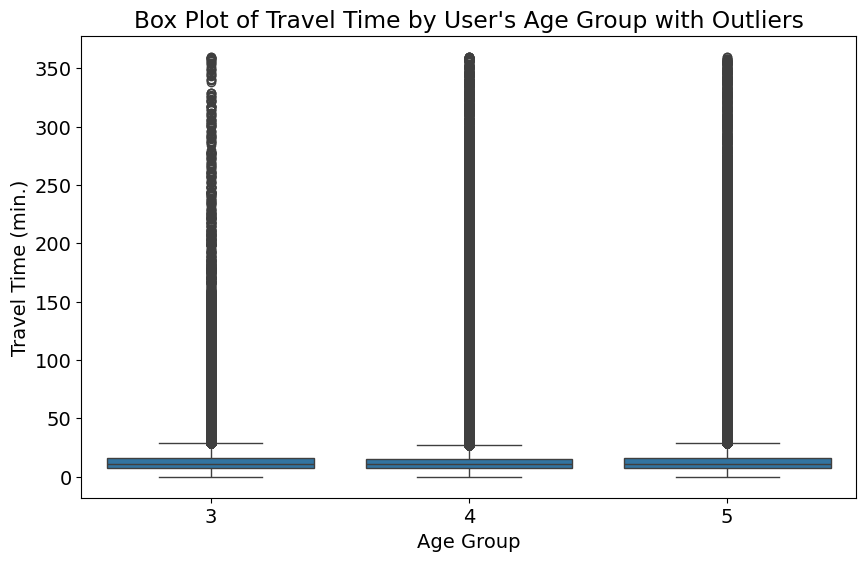

In [13]:
# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 14})

# Box-plot travel_time by ageRange
plt.figure(figsize=(10, 6))
sns.boxplot(x='ageRange', y='travel_time_min', data=bike_full_df)
plt.title("Box Plot of Travel Time by User's Age Group with Outliers")
plt.xlabel('Age Group')
plt.ylabel('Travel Time (min.)')

# Save the plot to a PDF file
plt.savefig('box_plot_travel_time_user_age_3_4_5_with_outliers.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [10]:
"""
Filtering Outliers based on IQR on travel_time.
Known limitation as target Age groups [3,4,5] have similar distribution 
IQR: 15.00 - 7.40 = 7.60
We apply 1.5IQR Rule: 
Q3 + 1.5 * IQR = ~28.21 (Select 30' max allowed outliers) 
Q1 - 1.5 * IQR = 0 (travel_time cannot be negative)

In case other target Age Groups would be taken into account, outlier boundieries need to be reviewed.
"""

print(f"# instance prior removing outliers: {bike_full_df.shape[0]} ")

user_df_with_outliers = bike_full_df.copy(deep=True)
user_df_with_outliers = user_df_with_outliers['ageRange'].value_counts()

# Removing Outliers (Based on 1.5 * IQR):
bike_full_df = bike_full_df[bike_full_df['travel_time_min']<=30]

print("# instances per Age group after removing Outliers:")
display(bike_full_df['ageRange'].value_counts())

print(f"% Tot. outlier instances removed: {(1-(bike_full_df.shape[0]/user_df_with_outliers.sum()))*100}\n")
print(f"% Tot. outlier instances removed per Age group:{(1-(bike_full_df['ageRange'].value_counts()/user_df_with_outliers))*100}\n")
print(f"Tot. # instance after removing outliers: {bike_full_df.shape[0]} ")

# instance prior removing outliers: 1593152 
# instances per Age group after removing Outliers:


ageRange
4    811276
5    567989
3    145102
Name: count, dtype: int64

% Tot. outlier instances removed: 4.317541577953643

% Tot. outlier instances removed per Age group:ageRange
4    3.719826
5    4.809397
3    5.683606
Name: count, dtype: float64

Tot. # instance after removing outliers: 1524367 


In [9]:
# Filter out Outliers + 30'
bike_full_df = bike_full_df[bike_full_df['travel_time_min']<=30]

In [9]:
# The 43 columns contain technical columns, together with some duplicates (i.e. travel_time in sec. and in min., week_day name and day of week number, etc.)
# Tot. number of columns 30-33
print(bike_full_df.shape)
bike_full_df.head()


(1524367, 43)


,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,temp_unplug_hourTime,year,month,day,hour,travel_time_min,travel_revenue,id_weather,80,81,82,83,86,87,88,89,date,week_day,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc,day_of_week,unplug_station_tot_bases,idunplug_latitude,idunplug_longitude,plug_station_tot_bases,idplug_latitude,idplug_longitude,mh_distance_meters,time_group,unique_user_day_code,tot_trips_day
1593312,5ee8f79e0c2c8fe0b914a25a,1af785bbef3edd2e9973c61ffb32300355dc4f5fd98dea...,12,1,9,807,43,4,9,2019-10-08T13:00:00Z,28010,2019-10-08 13:00:00+00:00,2019,10,8,13,13.450000,0.5,24,NaN,1.07,175.0,20.5,48.0,945.0,193.0,0.0,2019-10-08,tuesday,workingday,workingday,workingday,1,27,40.411274,-3.708834,24,40.427868,-3.695440,3196.327858,2,1af785bbef3edd2e9973c61ffb32300355dc4f5fd98dea...,4
446505,5c9aafed2f38432afc2ebd4d,6d9ae36e2cc85ecf2f6e42e4682a952216a7a260fcec5b...,8,1,11,957,111,4,150,2019-03-22T14:00:00.000+0100,48901,2019-03-22 14:00:00,2019,3,22,14,15.950000,0.5,24,24.0,1.36,160.0,10.3,43.0,954.0,242.0,0.0,2019-03-22,friday,workingday,workingday,workingday,4,18,40.425100,-3.687723,24,40.447125,-3.700167,3710.475804,2,6d9ae36e2cc85ecf2f6e42e4682a952216a7a260fcec5b...,2
1845449,5ee9c542f2a5d0b19f475096,056d03001f05045d11c1fd85825e60e11fff54c68fc925...,4,1,3,463,128,3,54,2019-11-17T01:00:00Z,28045,2019-11-17 01:00:00+00:00,2019,11,17,1,7.716667,0.5,24,NaN,1.13,205.0,6.5,74.0,942.0,2.0,0.6,2019-11-17,sunday,weekend,weekend,weekend,6,24,40.403221,-3.694477,24,40.408368,-3.693346,684.148472,0,056d03001f05045d11c1fd85825e60e11fff54c68fc925...,5
1508402,5ee8add989a02fad249e78bf,3440e40dc55f8d252b13ef4b9e73d3ff3d3422abb36b8a...,13,1,21,886,11,4,207,2019-09-27T12:00:00Z,28041,2019-09-27 12:00:00+00:00,2019,9,27,12,14.766667,0.5,24,NaN,1.23,90.0,20.6,49.0,945.0,223.0,0.0,2019-09-27,friday,workingday,workingday,workingday,4,24,40.425086,-3.691881,27,40.434361,-3.714917,3374.071224,2,3440e40dc55f8d252b13ef4b9e73d3ff3d3422abb36b8a...,2
121733,5c5f0cfb2f38433f88d1cbfa,2419944285fe502025d1bf259ae5074185e967182e686d...,21,1,5,431,66,5,96,2019-01-26T12:00:00.000+0100,28009,2019-01-26 12:00:00+01:00,2019,1,26,12,7.183333,0.5,24,9.0,0.99,237.0,5.4,73.0,947.0,122.0,0.0,2019-01-26,saturday,weekend,weekend,weekend,5,24,40.421315,-3.672497,24,40.426134,-3.678744,1168.550773,2,2419944285fe502025d1bf259ae5074185e967182e686d...,3


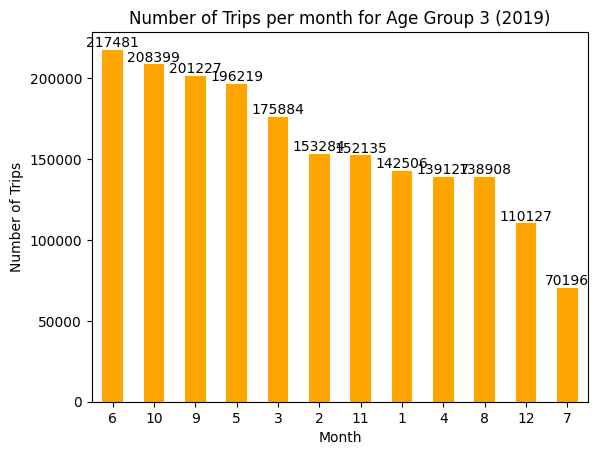

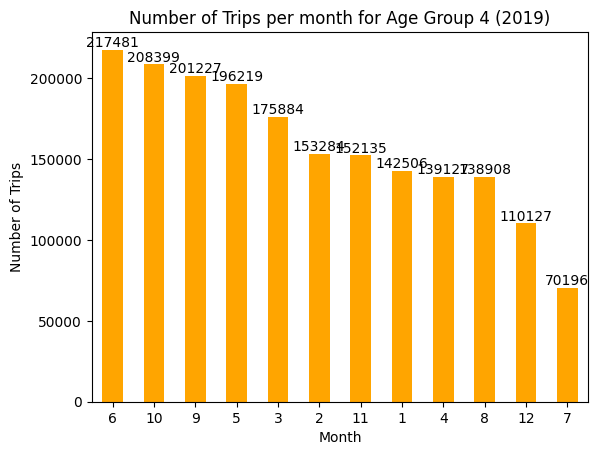

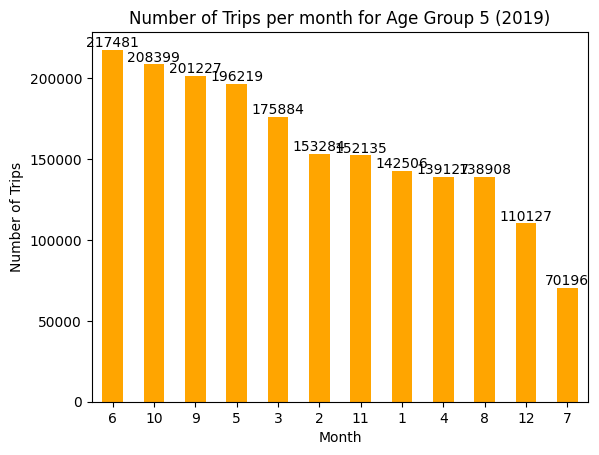

In [7]:
"""Number of trips per month per Age Group:"""

val_age = [3,4,5]

for val in val_age:
    trips_month = [bike_full_df['ageRange']==val]

    # Trips per month
    trips_month = bike_full_df['month'].value_counts()

    # Create barplot
    ax =trips_month.plot(kind='bar', rot=0, color=['orange'])

    # Add values on top of each bar
    for i, v in enumerate(trips_month):
        ax.text(i, v + 1, v, ha='center', va='bottom', color='black')

    plt.xlabel('Month')
    plt.ylabel('Number of Trips')
    plt.title(f"Number of Trips per month for Age Group {val} (2019)")

    # Show the plot
    plt.show()


## Correlation Matrix

In [7]:
selected_features = ['idunplug_latitude', 
'idunplug_longitude',
'unplug_station_tot_bases', 
'idplug_latitude', 
'idplug_longitude',  
'plug_station_tot_bases',
'travel_time',
'mh_distance_meters',
'travel_revenue', 
'tot_trips_day',
'ageRange', 
'month', 
'day',
'day_of_week', 
'hour',
'81', 
'82', 
'83', 
'86', 
'87', 
'88', 
'89', 
]

In [9]:
corr_matr_bike_df = bike_full_df[selected_features]

Text(0.5, 1.0, 'Feature correlations in Dataset')

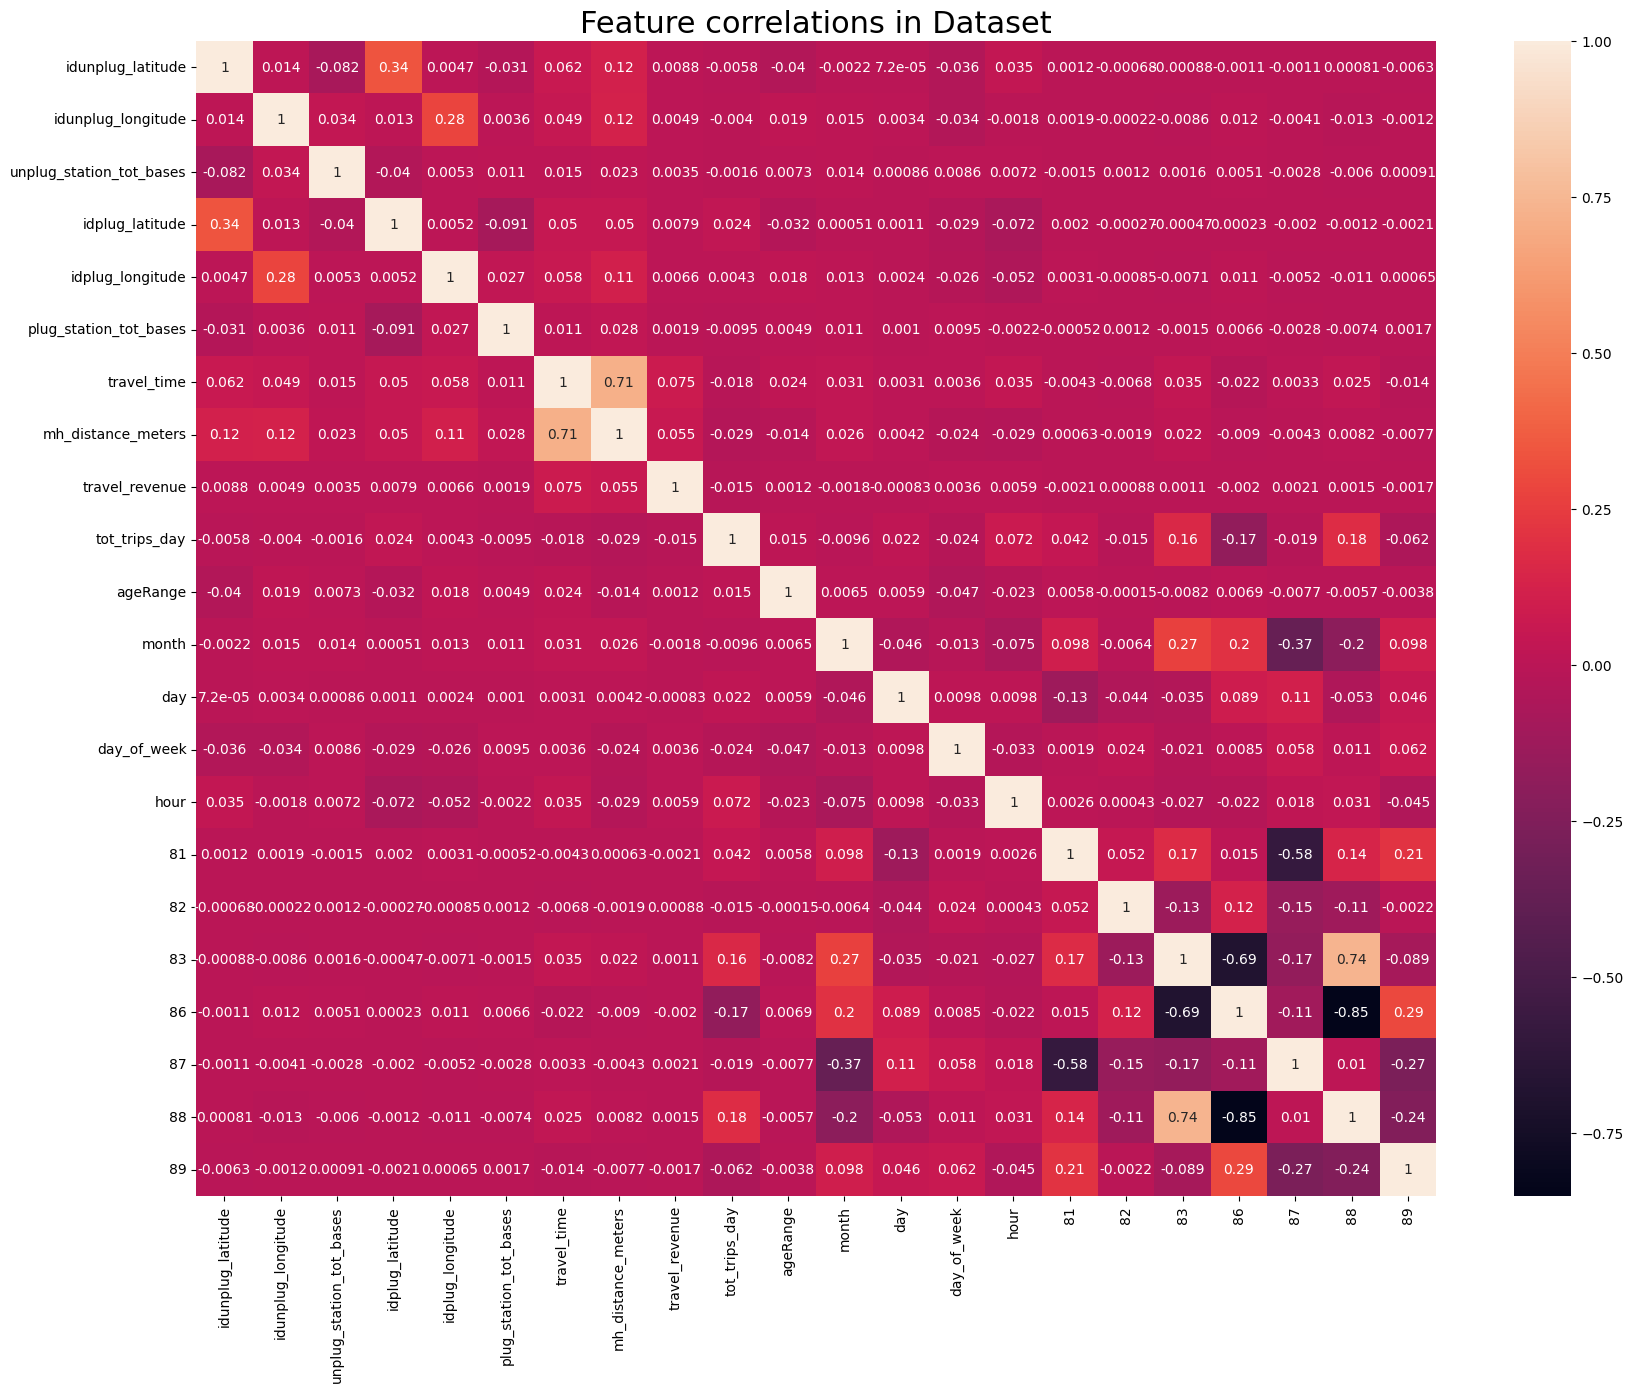

In [10]:
plt.figure(figsize=(20,15))
sns.heatmap(corr_matr_bike_df.corr(),annot=True, fmt='.2g')
plt.title('Feature correlations in Dataset',fontsize=22)

In [ ]:
# To be used with full merged dataframe
def plot_heatmap_age(df, x_col_name, y_col_name,plot_title):
    plot_title = str(plot_title)
    sns.set(style='whitegrid', font_scale=1.2)
    heatmap_data = df.pivot_table(values=y_col_name, index=x_col_name, aggfunc=np.mean)
    sns.heatmap(heatmap_data, cmap='YlOrRd')
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(plot_title)
    plt.show()

plot_heatmap_age(bike_full_df, 'ageRange', 'travel_time','Heat map of travel time (s) per Age Group')

In [ ]:
# To be used with full merged dataframe
def plot_heatmap_age(df, x_col_name, y_col_name,plot_title):
    plot_title = str(plot_title)
    sns.set(style='whitegrid', font_scale=1.2)
    heatmap_data = df.pivot_table(values=y_col_name, index=x_col_name, aggfunc=np.mean)
    sns.heatmap(heatmap_data, cmap='YlOrRd')
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(plot_title)
    plt.show()

plot_heatmap_age(bike_full_df, 'ageRange', 'mh_distance_meters','Heat map of travel distance (m) per Age Group')

In [ ]:
# To be used with full merged dataframe
def plot_heatmap_age(df, x_col_name, y_col_name,plot_title):
    plot_title = str(plot_title)
    sns.set(style='whitegrid', font_scale=1.2)
    heatmap_data = df.pivot_table(values=y_col_name, index=x_col_name, aggfunc=np.mean)
    sns.heatmap(heatmap_data, cmap='YlOrRd')
    plt.xlabel(x_col_name)
    plt.ylabel(y_col_name)
    plt.title(plot_title)
    plt.show()

plot_heatmap_age(bike_full_df, 'ageRange', 'hour','Heat map of travel hour per Age Group')

## Information Gain 


In [17]:
# Keeping Only target AgeGroups
bike_full_df = bike_full_df[bike_full_df['ageRange'].isin([3,4,5])]

print(bike_full_df.shape)
print(bike_full_df.dtypes)

(1905493, 43)
_id                           object
user_day_code                 object
idplug_base                    int64
user_type                      int64
idunplug_base                  int64
travel_time                    int64
idunplug_station               int64
ageRange                       int64
idplug_station                 int64
unplug_hourTime               object
zip_code                      object
temp_unplug_hourTime          object
year                           int64
month                          int64
day                            int64
hour                           int64
travel_time_min              float64
travel_revenue               float64
id_weather                     int64
80                           float64
81                           float64
82                           float64
83                           float64
86                           float64
87                           float64
88                           float64
89                      

In [49]:
bike_full_df['ageRange'].unique()

array([5, 3, 4], dtype=int64)

In [50]:
# Support function to calculate Entropy
def calculate_entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Support function to calculate Information Gain
def information_gain(data, feature_column, target_column):
    # Step 1: Calculate entropy of the target variable before splitting
    entropy_before_split = calculate_entropy(data[target_column])
    
    # Step 2: Calculate weighted sum of entropies for each unique value in the feature
    weighted_entropy_after_split = 0
    for value in data[feature_column].unique():
        subset = data[data[feature_column] == value]
        entropy_after_split = calculate_entropy(subset[target_column])
        weight = len(subset) / len(data)
        weighted_entropy_after_split += weight * entropy_after_split
    
    # Step 3: Calculate information gain
    information_gain = entropy_before_split - weighted_entropy_after_split
    return information_gain

In [51]:
# Support function to be able to calculate 1 vs rest info gain
def replace_values_info_gain_ageRange(column,target_val=3):
    # Define a function to replace values
    def replace_value(val):
        if val == target_val:
            return 'Yes'
        else:
            return 'No'

    # Apply the function to each element in the column
    return column.apply(replace_value)

# Apply function
bike_full_df['IG_3']= replace_values_info_gain_ageRange(bike_full_df['ageRange'],target_val=3)
bike_full_df['IG_4']= replace_values_info_gain_ageRange(bike_full_df['ageRange'],target_val=4)
bike_full_df['IG_5']= replace_values_info_gain_ageRange(bike_full_df['ageRange'],target_val=5)


# Display the updated DataFrame
print(bike_full_df['IG_3'].unique())
print(bike_full_df['IG_4'].unique())
print(bike_full_df['IG_5'].unique())


['No' 'Yes']
['No' 'Yes']
['Yes' 'No']


Information Gain ageRange: 3
Inf. Gain Calculation Time ageRange 3: 990.7277710437775


,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,idplug_station,temp_unplug_hourTime,year,month,day,hour,travel_revenue,id_weather,81,82,83,86,87,88,89,week_day,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc,day_of_week,unplug_station_tot_bases,idunplug_latitude,idunplug_longitude,plug_station_tot_bases,idplug_latitude,idplug_longitude,mh_distance_meters,time_group,tot_trips_day
Information_Gain_3,0.000216,0.000011,0.000053,0.000973,0.006643,0.006899,0.01325,0.0,0.000045,0.000088,0.007307,0.00004,0.0,0.001042,0.000548,0.001167,0.000474,0.000155,0.00125,0.000291,0.00156,0.001668,0.001669,0.001688,0.00156,0.000339,0.006643,0.006643,0.000379,0.006899,0.006899,0.082767,0.004135,0.0007


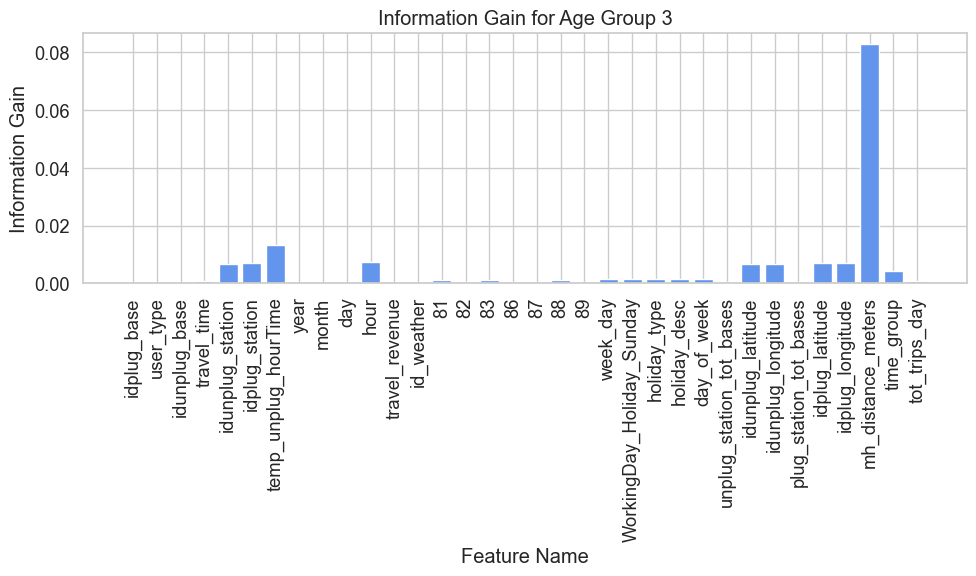

In [115]:
# Initialize a dictionary to store the results
results_3 = {}

# Information Gain for Age Group 3
print("Information Gain ageRange: 3")
# Measure IG calc time
start_time = time.time()
for col_name in [ 'idplug_base', 'user_type', 'idunplug_base', 'travel_time', 'idunplug_station', 'idplug_station', 'temp_unplug_hourTime', 'year', 'month', 'day', 'hour', 'travel_revenue', 'id_weather', '81', '82', '83', '86', '87', '88', '89', 'week_day', 'WorkingDay_Holiday_Sunday', 'holiday_type', 'holiday_desc', 'day_of_week', 'unplug_station_tot_bases', 'idunplug_latitude', 'idunplug_longitude', 'plug_station_tot_bases', 'idplug_latitude', 'idplug_longitude', 'mh_distance_meters', 'time_group', 'tot_trips_day']:
    ig_value = information_gain(bike_full_df, col_name, 'IG_3')
    results_3[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_3_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 3: {ig_3_time}")

# Convert the results dictionary into a DataFrame
info_gain_3_df = pd.DataFrame.from_dict(results_3, orient='index', columns=['Information_Gain_3'])
info_gain_3_df = info_gain_3_df.T

# Display the DataFrame
display(info_gain_3_df)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_3.keys(), results_3.values(), color='cornflowerblue')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain for Age Group 3')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Information Gain ageRange: 4
Inf. Gain Calculation Time ageRange 4: 959.7456884384155


,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,idplug_station,temp_unplug_hourTime,year,month,day,hour,travel_revenue,id_weather,81,82,83,86,87,88,89,week_day,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc,day_of_week,unplug_station_tot_bases,idunplug_latitude,idunplug_longitude,plug_station_tot_bases,idplug_latitude,idplug_longitude,mh_distance_meters,time_group,tot_trips_day
Information_Gain_4,0.000147,0.000002,0.00005,0.001111,0.011452,0.010651,0.007885,0.0,0.000474,0.000046,0.001914,0.000002,0.0,0.000518,0.000204,0.000649,0.000221,0.000079,0.000598,0.000054,0.00015,0.000162,0.000163,0.000174,0.00015,0.00042,0.011452,0.011452,0.000353,0.010651,0.010651,0.151315,0.00153,0.00027


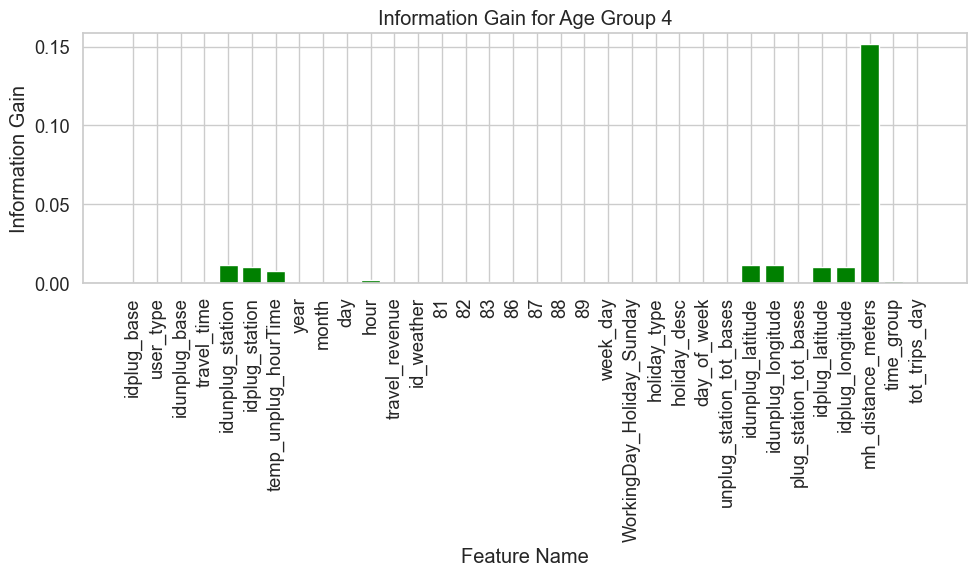

In [116]:
# Initialize a dictionary to store the results
results_4 = {}

# Information Gain for Age Group 4
print("Information Gain ageRange: 4")
# Measure IG calc time
start_time = time.time()
for col_name in [ 'idplug_base', 'user_type', 'idunplug_base', 'travel_time', 'idunplug_station', 'idplug_station', 'temp_unplug_hourTime', 'year', 'month', 'day', 'hour', 'travel_revenue', 'id_weather', '81', '82', '83', '86', '87', '88', '89', 'week_day', 'WorkingDay_Holiday_Sunday', 'holiday_type', 'holiday_desc', 'day_of_week', 'unplug_station_tot_bases', 'idunplug_latitude', 'idunplug_longitude', 'plug_station_tot_bases', 'idplug_latitude', 'idplug_longitude', 'mh_distance_meters', 'time_group', 'tot_trips_day']:
    ig_value = information_gain(bike_full_df, col_name, 'IG_4')
    results_4[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_4_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 4: {ig_4_time}")

# Convert the results dictionary into a DataFrame
info_gain_4_df = pd.DataFrame.from_dict(results_4, orient='index', columns=['Information_Gain_4'])
info_gain_4_df = info_gain_4_df.T

# Display the DataFrame
display(info_gain_4_df)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_4.keys(), results_4.values(), color='green')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain for Age Group 4')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Information Gain ageRange: 5
Inf. Gain Calculation Time ageRange 5: 957.4857277870178


,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,idplug_station,temp_unplug_hourTime,year,month,day,hour,travel_revenue,id_weather,81,82,83,86,87,88,89,week_day,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc,day_of_week,unplug_station_tot_bases,idunplug_latitude,idunplug_longitude,plug_station_tot_bases,idplug_latitude,idplug_longitude,mh_distance_meters,time_group,tot_trips_day
Information_Gain_5,0.00014,0.000013,0.000051,0.001258,0.010701,0.009829,0.01456,0.0,0.000438,0.000131,0.007286,0.000033,0.0,0.001262,0.000559,0.001442,0.000516,0.000148,0.001469,0.000236,0.001405,0.001514,0.001515,0.001532,0.001405,0.000342,0.010701,0.010701,0.000254,0.009829,0.009829,0.149399,0.004818,0.000493


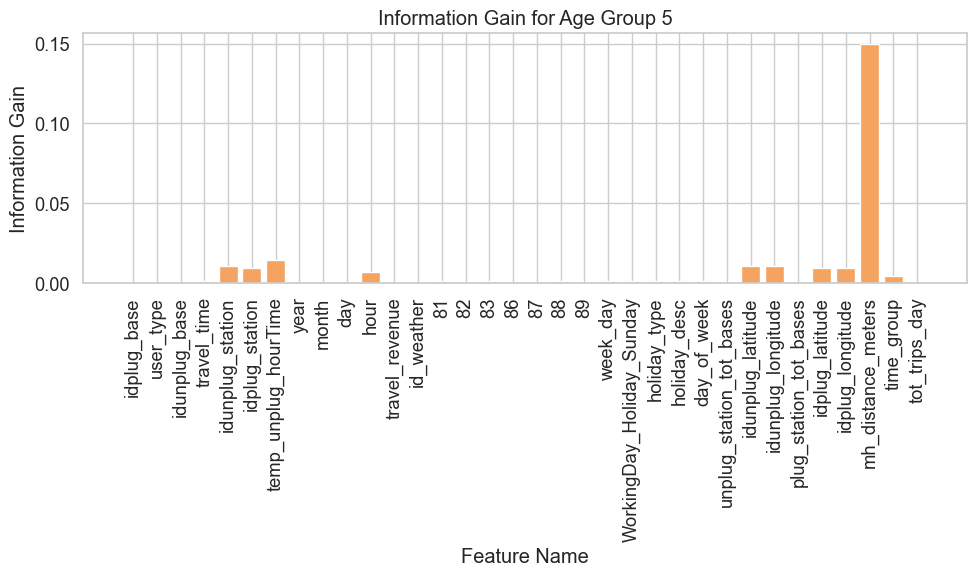

In [117]:
# Initialize a dictionary to store the results
results_5 = {}

# Information Gain for Age Group 5
print("Information Gain ageRange: 5")
# Measure IG calc time
start_time = time.time()
for col_name in [ 'idplug_base', 'user_type', 'idunplug_base', 'travel_time', 'idunplug_station', 'idplug_station', 'temp_unplug_hourTime', 'year', 'month', 'day', 'hour', 'travel_revenue', 'id_weather', '81', '82', '83', '86', '87', '88', '89', 'week_day', 'WorkingDay_Holiday_Sunday', 'holiday_type', 'holiday_desc', 'day_of_week', 'unplug_station_tot_bases', 'idunplug_latitude', 'idunplug_longitude', 'plug_station_tot_bases', 'idplug_latitude', 'idplug_longitude', 'mh_distance_meters', 'time_group', 'tot_trips_day']:
    ig_value = information_gain(bike_full_df, col_name, 'IG_5')
    results_5[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_5_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 5: {ig_5_time}")

# Convert the results dictionary into a DataFrame
info_gain_5_df = pd.DataFrame.from_dict(results_5, orient='index', columns=['Information_Gain_5'])
info_gain_5_df = info_gain_5_df.T

# Display the DataFrame
display(info_gain_5_df)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_5.keys(), results_5.values(), color='sandybrown')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain for Age Group 5')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

### Information Gain w/o manhattan distance 

In [54]:
features_info_gain_no_distance = ['idplug_base', 
'user_type', 
'idunplug_base', 
'idunplug_station',
'idunplug_latitude', 
'idunplug_longitude',
'unplug_station_tot_bases',  
'idplug_station',
'idplug_latitude', 
'idplug_longitude',
'plug_station_tot_bases',
'travel_time', 
'travel_revenue', 
'tot_trips_day',
'year', 
'month', 
'day', 
'hour',
'time_group',
'81', 
'82', 
'83', 
'86', 
'87', 
'88', 
'89', 
'week_day',
'day_of_week', 
'WorkingDay_Holiday_Sunday', 
'holiday_type', 
'holiday_desc'  
]

Information Gain ageRange: 3
Inf. Gain Calculation Time ageRange 3: 97.69946074485779


,idplug_base,user_type,idunplug_base,idunplug_station,idunplug_latitude,idunplug_longitude,unplug_station_tot_bases,idplug_station,idplug_latitude,idplug_longitude,plug_station_tot_bases,travel_time,travel_revenue,tot_trips_day,year,month,day,hour,time_group,81,82,83,86,87,88,89,week_day,day_of_week,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc
Information_Gain_3,0.000216,0.000011,0.000053,0.006643,0.006643,0.006643,0.000339,0.006899,0.006899,0.006899,0.000379,0.000973,0.00004,0.0007,0.0,0.000045,0.000088,0.007307,0.004135,0.001042,0.000548,0.001167,0.000474,0.000155,0.00125,0.000291,0.00156,0.00156,0.001668,0.001669,0.001688


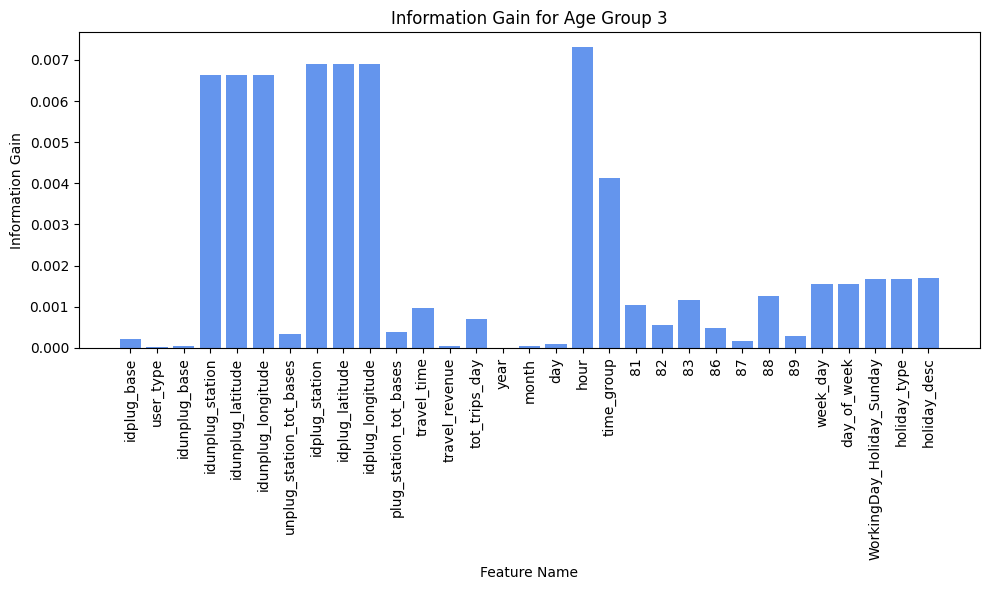

In [55]:
# Initialize a dictionary to store the results
results_3 = {}

# Information Gain for Age Group 3
print("Information Gain ageRange: 3")
# Measure IG calc time
start_time = time.time()
for col_name in features_info_gain_no_distance:
    ig_value = information_gain(bike_full_df, col_name, 'IG_3')
    results_3[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_3_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 3: {ig_3_time}")

# Convert the results dictionary into a DataFrame
info_gain_3_df = pd.DataFrame.from_dict(results_3, orient='index', columns=['Information_Gain_3'])
info_gain_3_df = info_gain_3_df.T

# Display the DataFrame
display(info_gain_3_df)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_3.keys(), results_3.values(), color='cornflowerblue')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain for Age Group 3')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

Information Gain ageRange: 4
Inf. Gain Calculation Time ageRange 4: 99.79376482963562


,idplug_base,user_type,idunplug_base,idunplug_station,idunplug_latitude,idunplug_longitude,unplug_station_tot_bases,idplug_station,idplug_latitude,idplug_longitude,plug_station_tot_bases,travel_time,travel_revenue,tot_trips_day,year,month,day,hour,time_group,81,82,83,86,87,88,89,week_day,day_of_week,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc
Information_Gain_4,0.000147,0.000002,0.00005,0.011452,0.011452,0.011452,0.00042,0.010651,0.010651,0.010651,0.000353,0.001111,0.000002,0.00027,0.0,0.000474,0.000046,0.001914,0.00153,0.000518,0.000204,0.000649,0.000221,0.000079,0.000598,0.000054,0.00015,0.00015,0.000162,0.000163,0.000174


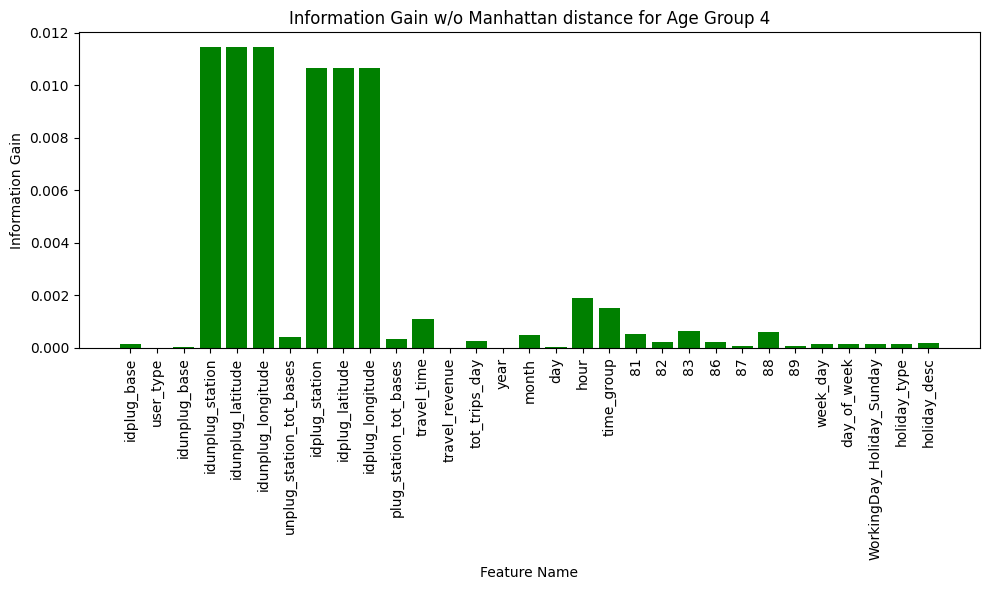

In [56]:
# Initialize a dictionary to store the results
results_4 = {}

# Information Gain for Age Group 4
print("Information Gain ageRange: 4")
# Measure IG calc time
start_time = time.time()
for col_name in features_info_gain_no_distance:
    ig_value = information_gain(bike_full_df, col_name, 'IG_4')
    results_4[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_4_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 4: {ig_4_time}")

# Convert the results dictionary into a DataFrame
info_gain_4_df = pd.DataFrame.from_dict(results_4, orient='index', columns=['Information_Gain_4'])
info_gain_4_df = info_gain_4_df.T

# Display the DataFrame
display(info_gain_4_df)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_4.keys(), results_4.values(), color='green')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain w/o Manhattan distance for Age Group 4')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

Information Gain ageRange: 5
Inf. Gain Calculation Time ageRange 5: 101.42374920845032


,idplug_base,user_type,idunplug_base,idunplug_station,idunplug_latitude,idunplug_longitude,unplug_station_tot_bases,idplug_station,idplug_latitude,idplug_longitude,plug_station_tot_bases,travel_time,travel_revenue,tot_trips_day,year,month,day,hour,time_group,81,82,83,86,87,88,89,week_day,day_of_week,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc
Information_Gain_5,0.00014,0.000013,0.000051,0.010701,0.010701,0.010701,0.000342,0.009829,0.009829,0.009829,0.000254,0.001258,0.000033,0.000493,0.0,0.000438,0.000131,0.007286,0.004818,0.001262,0.000559,0.001442,0.000516,0.000148,0.001469,0.000236,0.001405,0.001405,0.001514,0.001515,0.001532


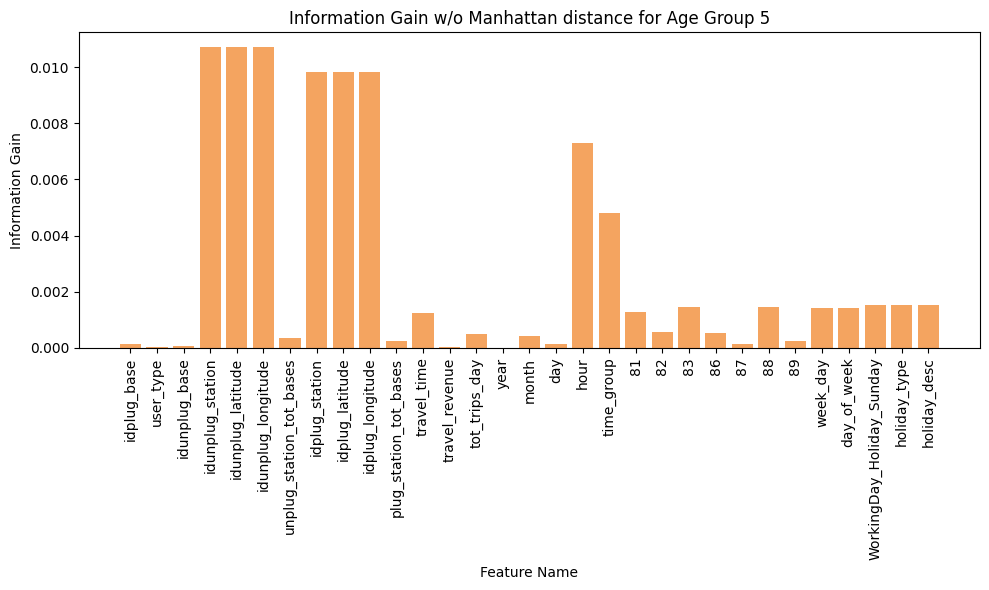

In [57]:
# Initialize a dictionary to store the results
results_5 = {}

# Information Gain for Age Group 5
print("Information Gain ageRange: 5")
# Measure IG calc time
start_time = time.time()
for col_name in features_info_gain_no_distance:
    ig_value = information_gain(bike_full_df, col_name, 'IG_5')
    results_5[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_5_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 5: {ig_5_time}")

# Convert the results dictionary into a DataFrame
info_gain_5_df = pd.DataFrame.from_dict(results_5, orient='index', columns=['Information_Gain_5'])
info_gain_5_df = info_gain_5_df.T

# Display the DataFrame
display(info_gain_5_df)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_5.keys(), results_5.values(), color='sandybrown')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain w/o Manhattan distance for Age Group 5')
plt.xticks(rotation=90)


plt.tight_layout()
plt.show()

## t-SNE Correlation

t-SNE done on representative subset from original dataset.

In [15]:
# Create representative subset dataset to be able to plot t-SNE:
bike_subset_tsne_df, __ = train_test_split(bike_full_df, stratify=bike_full_df["ageRange"],test_size=0.95, random_state=123)

In [16]:
bike_subset_tsne_df.shape

(95274, 43)

In [17]:
selected_columns_tsne = [
    'travel_time', 
    'idunplug_latitude',
    'idunplug_longitude',
    'unplug_station_tot_bases',
    'idplug_latitude',
    'idplug_longitude',
    'plug_station_tot_bases',
    'month',
    'day', 
    'hour',
    'travel_revenue',
    'tot_trips_day',
    'mh_distance_meters', 
    '81', 
    '82', 
    '83', 
    '86', 
    '87', 
    '88', 
    '89'   
       ]

In [18]:
filter_bike_subset_tsne_df = bike_subset_tsne_df[selected_columns_tsne]
print(filter_bike_subset_tsne_df.shape)
filter_bike_subset_tsne_df.dtypes

(95274, 20)


travel_time                   int64
idunplug_latitude           float64
idunplug_longitude          float64
unplug_station_tot_bases      int64
idplug_latitude             float64
idplug_longitude            float64
plug_station_tot_bases        int64
month                         int64
day                           int64
hour                          int64
travel_revenue              float64
tot_trips_day                 int64
mh_distance_meters          float64
81                          float64
82                          float64
83                          float64
86                          float64
87                          float64
88                          float64
89                          float64
dtype: object

In [19]:
rand_state = 123
tsne = TSNE(n_components=2, random_state=rand_state, learning_rate=50)

tsne_features = tsne.fit_transform(filter_bike_subset_tsne_df)

In [20]:
tsne_features[1:4,:]

array([[12.832292 , -1.4706004],
       [ 9.293444 , -7.562447 ],
       [ 5.077386 , 14.273599 ]], dtype=float32)

In [21]:
bike_subset_tsne_df['tsne_x'] = tsne_features[:,0]
bike_subset_tsne_df['tsne_y'] = tsne_features[:,1]

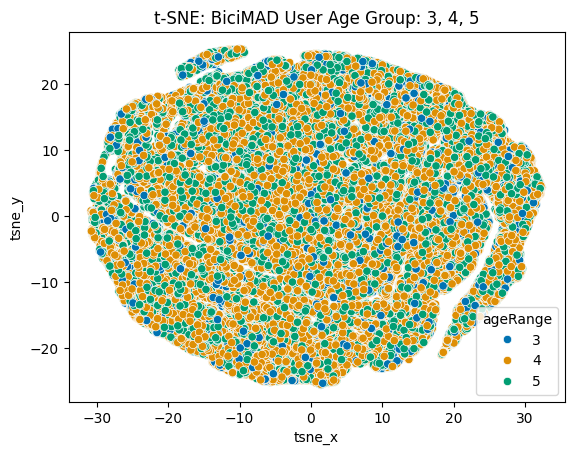

In [22]:
# Define color palette
custom_palette = sns.color_palette("colorblind")

sns.scatterplot(x='tsne_x',y='tsne_y',hue='ageRange',data=bike_subset_tsne_df,palette=custom_palette)
plt.title('t-SNE: BiciMAD User Age Group: 3, 4, 5')
plt.show()

## EDA on Training set

In [15]:
# # Keeping Only target AgeGroups
bike_full_df = bike_full_df[bike_full_df['ageRange'].isin([3,4,5])]

print(f"bike_full_df with target population age-cohort 3,4,5: {bike_full_df.shape}")

print(f"bike_full_df with outliers shape: {bike_full_df.shape}")
# Filter out Outliers + 30'
bike_full_df = bike_full_df[bike_full_df['travel_time_min']<=30]

print(f"bike_full_df without outliers shape: {bike_full_df.shape}")



bike_full_df with target population age-cohort 3,4,5: (1593152, 43)
bike_full_df with outliers shape: (1593152, 43)
bike_full_df without outliers shape: (1524367, 43)


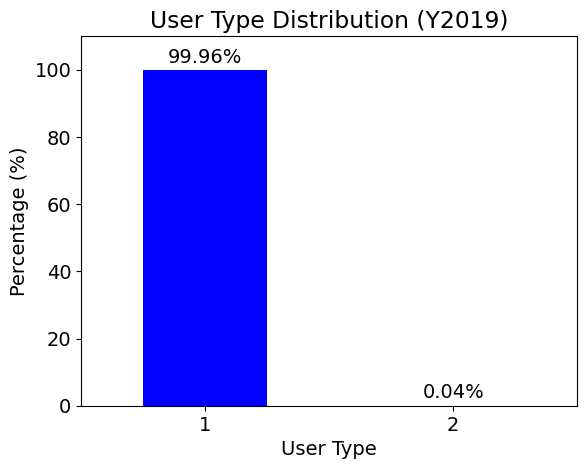

In [20]:
"""User type values after Filtaring Data {1:Annual subscription; 2:occasional user}"""

# User_type distribution
user_type_dist = (bike_full_df['user_type'].value_counts()/bike_full_df.shape[0])*100

# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 14})

# Create barplot
ax = user_type_dist.plot(kind='bar', rot=0, color=['blue'])

# Set ylim to ensure values on top of the bars do not overlap with the graph limits
ax.set_ylim(0, user_type_dist.max() + 10)

# Add values on top of each bar
for i, v in enumerate(user_type_dist):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', color='black')

plt.xlabel('User Type')
plt.ylabel('Percentage (%)')
plt.title('User Type Distribution (Y2019)')

# # Save the plot to a PDF file
plt.savefig('labeled_user_type_distribution_3_4_5.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

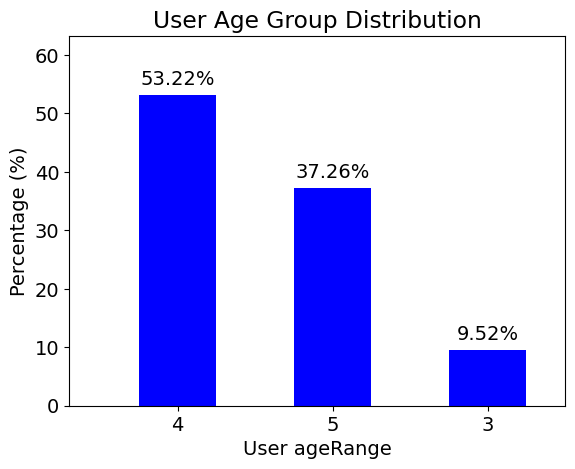

In [12]:
"""User ageRange values after Filtering Data: {3:[19:26]; 4:[27:40]; 5:[41:65]}"""

# User Age group distribution w/o filtering
user_age_dist = (bike_full_df['ageRange'].value_counts()/bike_full_df.shape[0])*100 

# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 14})

# Create barplot
ax = user_age_dist.plot(kind='bar', rot=0, color=['blue'])

# Set ylim to ensure values on top of the bars do not overlap with the graph limits
ax.set_ylim(0, user_age_dist.max() + 10)

# Add values on top of each bar
for i, v in enumerate(user_age_dist):
    ax.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom', color='black')

# Adjust x-axis limits if necessary
ax.set_xlim(-0.7, len(user_age_dist) - 0.5)

plt.xlabel('User ageRange')
plt.ylabel('Percentage (%)')
plt.title('User Age Group Distribution')

# Save the plot to a PDF file
plt.savefig('labeled_user_age_group_distribution_3_4_5.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


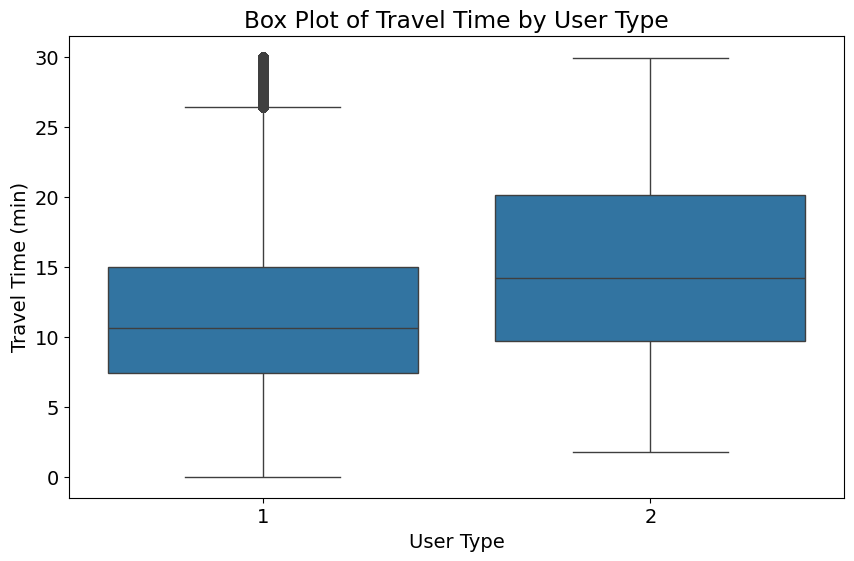

In [79]:
# Box-plot travel_time by user_type

# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 14})

plt.figure(figsize=(10, 6))
sns.boxplot(x='user_type', y='travel_time_min', data=bike_full_df)
plt.title('Box Plot of Travel Time by User Type')
plt.xlabel('User Type')
plt.ylabel('Travel Time (min)')


# Save the plot to a PDF file
plt.savefig('box_plot_travel_time_user_type_3_4_5.pdf', format='pdf', bbox_inches='tight')

plt.show()

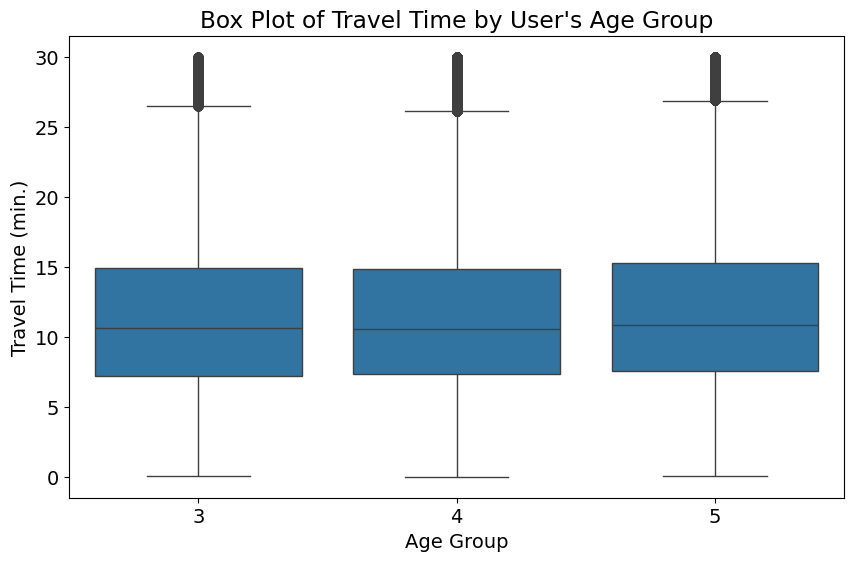

In [36]:
# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 14})

# Box-plot travel_time by ageRange
plt.figure(figsize=(10, 6))
sns.boxplot(x='ageRange', y='travel_time_min', data=bike_full_df)
plt.title("Box Plot of Travel Time by User's Age Group")
plt.xlabel('Age Group')
plt.ylabel('Travel Time (min.)')

# Save the plot to a PDF file
plt.savefig('box_plot_travel_time_user_age_3_4_5.pdf', format='pdf', bbox_inches='tight')

plt.show()

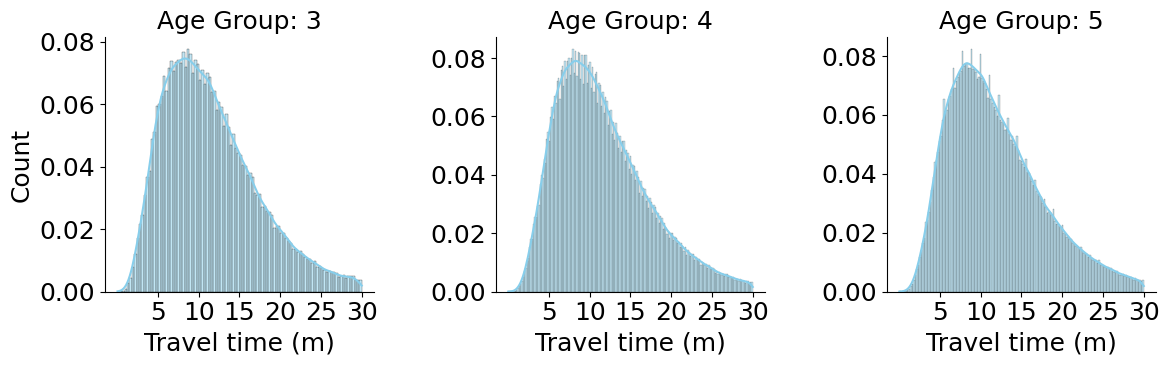

In [34]:
"""
User ageRange values: {3:[19:26]; 4:[27:40]; 5:[41:65]}
"""
# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 18})

# Display most popular hours of the day re-scaled to better appreciate each group distribution
popular_hours = bike_full_df[['_id', 'travel_time_min', 'ageRange']]

# Create graph per ageRange showing the count of trips per hour
g = sns.FacetGrid(popular_hours, col='ageRange', col_wrap=3, height=4, sharey=False)

# Map distplot with normal distribution fit
g.map(sns.histplot, 'travel_time_min',  kde=True, stat='density', color='skyblue')

# Set x-axis ticks
plt.xticks([5, 10, 15, 20, 25,  30])

# Set titles and labels
g.set_axis_labels('Travel time (m)', 'Count')
g.set_titles('Age Group: {col_name}')

# Save the plot to a PDF file
plt.savefig('travel_time_distri_user_age_3_4_5.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


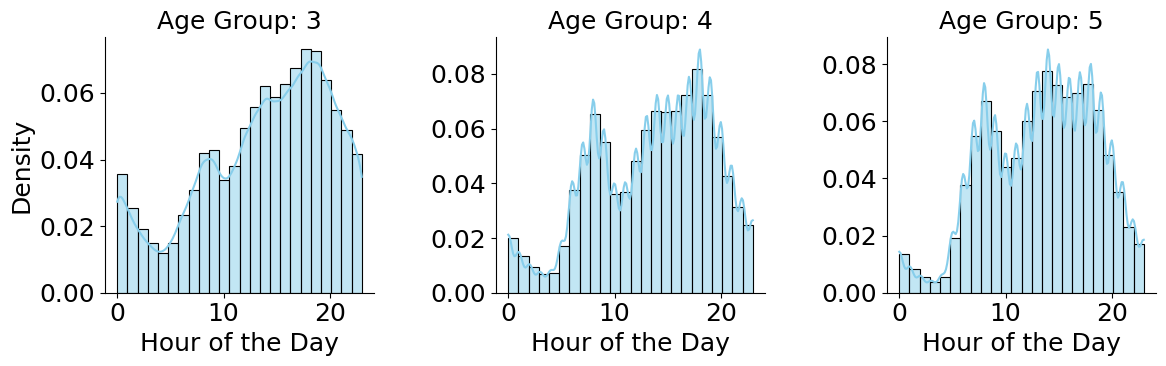

In [24]:
"""
User ageRange values: {3:[19:26]; 4:[27:40]; 5:[41:65]}
"""
# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 18})

# Display most popular hours of the day re-scaled to better appreciate each group distribution
popular_hours = bike_full_df[['_id', 'hour', 'ageRange']]

# Create graph per ageRange showing the count of trips per hour
g = sns.FacetGrid(popular_hours, col='ageRange', col_wrap=3, height=4, sharey=False)

# Map distplot with normal distribution fit
g.map(sns.histplot, 'hour', bins=24, kde=True, stat='density', color='skyblue')

# Set titles and labels
g.set_axis_labels('Hour of the Day', 'Density')
g.set_titles('Age Group: {col_name}')

# Save the plot to a PDF file
plt.savefig('travel_hour_density_user_age_3_4_5.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()


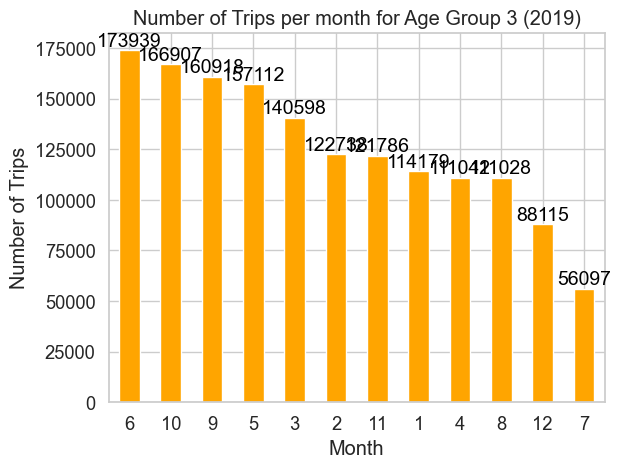

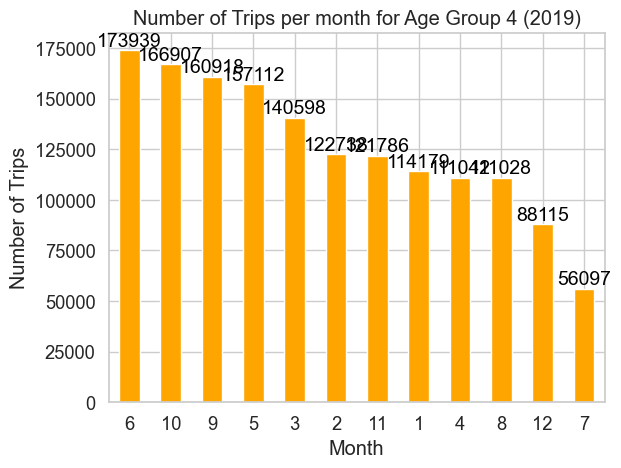

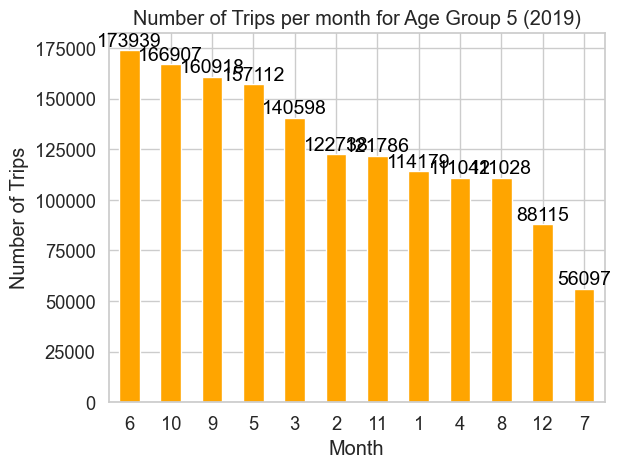

In [113]:
"""Number of trips per month per Age Group:"""

val_age = [3,4,5]

for val in val_age:
    trips_month = [bike_full_df['ageRange']==val]

    # Trips per month
    trips_month = bike_full_df['month'].value_counts()

    # Create barplot
    ax =trips_month.plot(kind='bar', rot=0, color=['orange'])

    # Add values on top of each bar
    for i, v in enumerate(trips_month):
        ax.text(i, v + 1, v, ha='center', va='bottom', color='black')

    plt.xlabel('Month')
    plt.ylabel('Number of Trips')
    plt.title(f"Number of Trips per month for Age Group {val} (2019)")

    # Show the plot
    plt.show()


In [16]:
selected_features = [
'unplug_station_tot_bases', 
'idplug_latitude', 
'idplug_longitude',  
'plug_station_tot_bases',
'travel_time',
'mh_distance_meters',
'travel_revenue', 
'tot_trips_day',
'ageRange', 
'month', 
'day',
'day_of_week', 
'hour',
'81', 
'82', 
'83', 
'86', 
'87', 
'88', 
'89', 
]

In [17]:
corr_matr_bike_df = bike_full_df[selected_features]

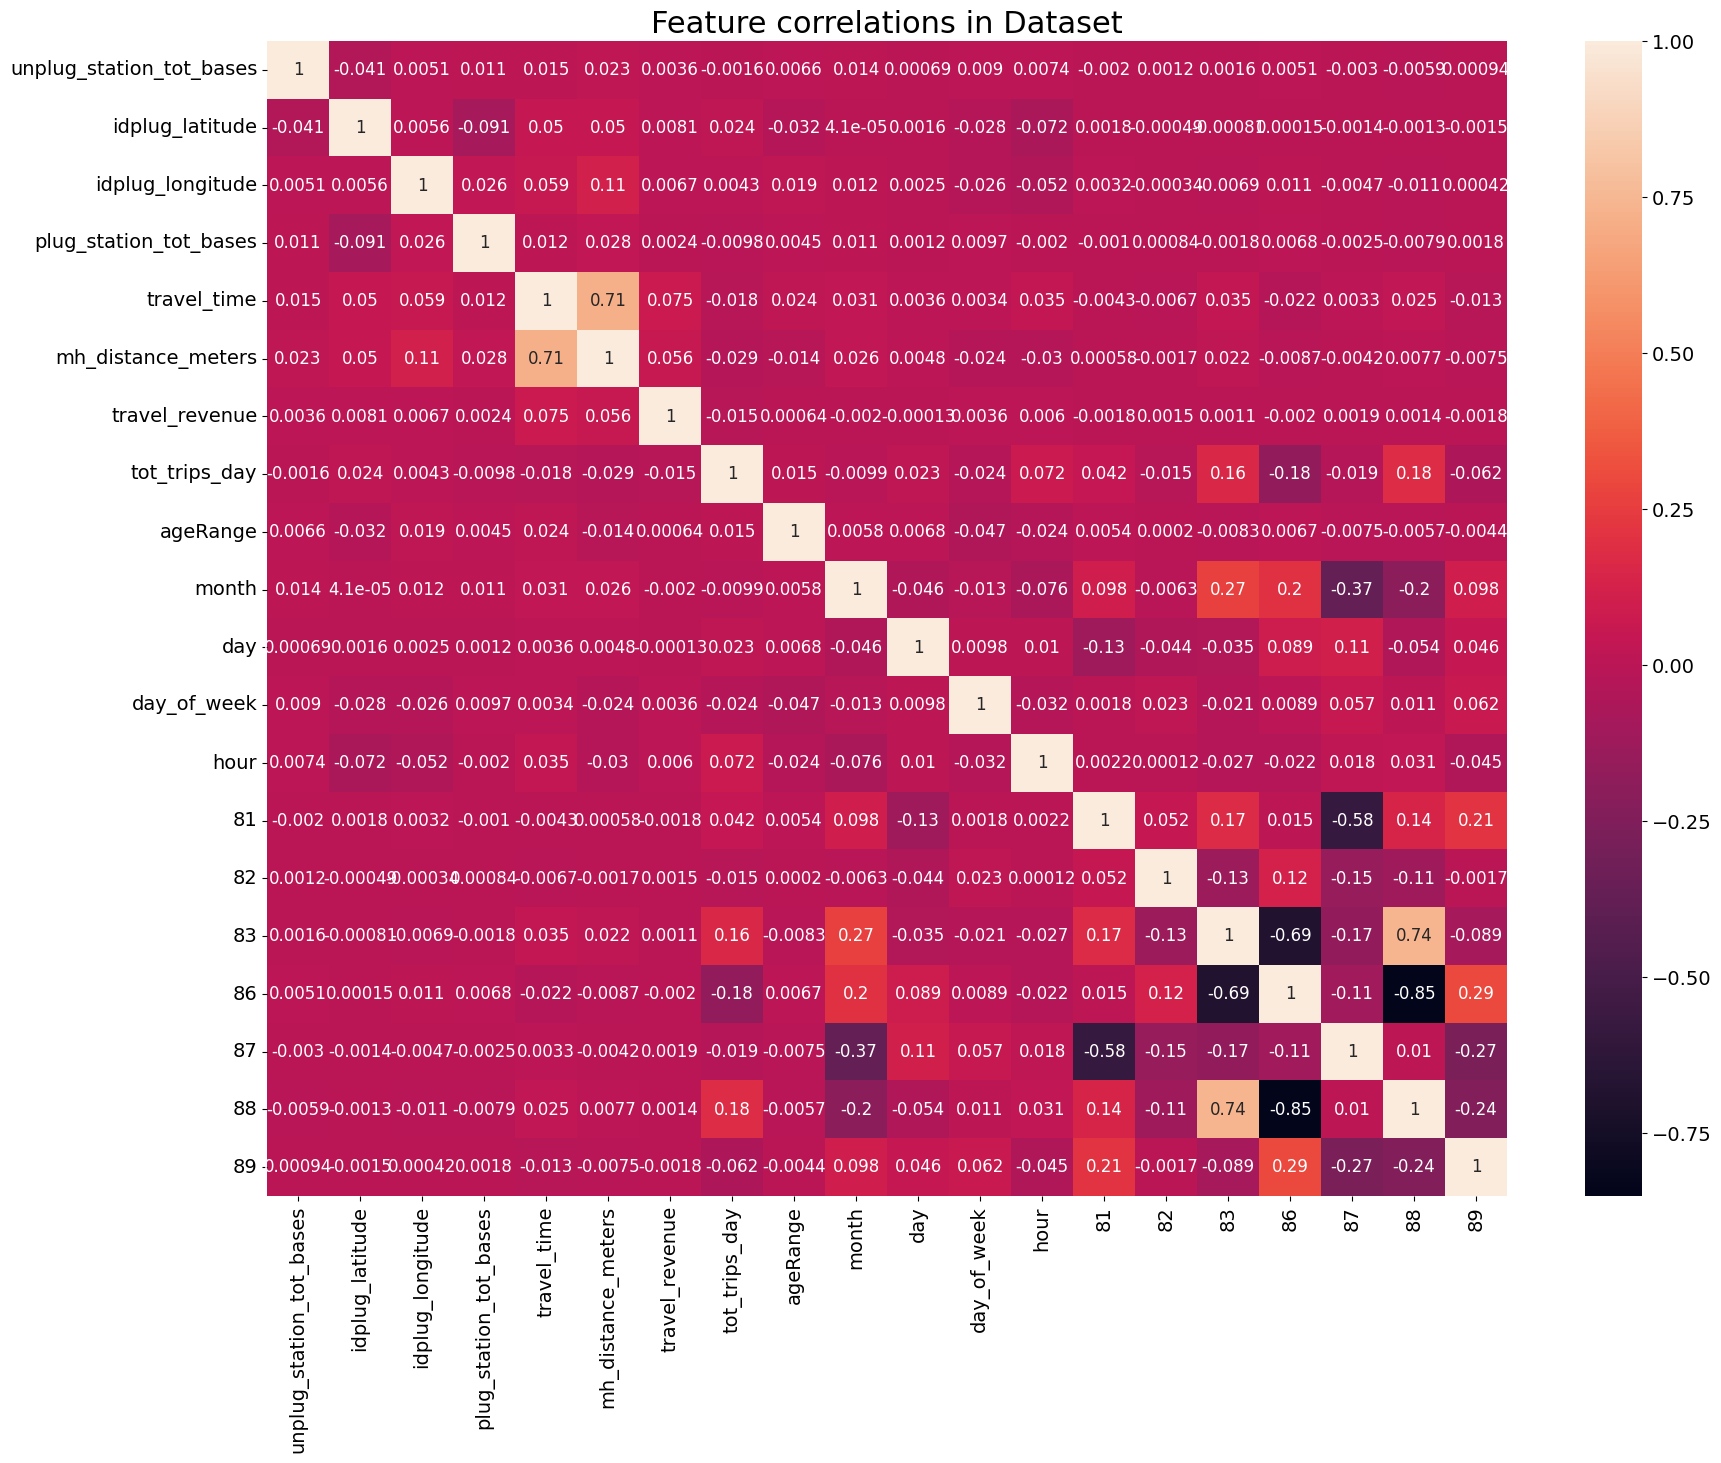

In [19]:
# Set font size to be further exported for the paper
#plt.rcParams.update({'font.size': 13})
plt.figure(figsize=(20,15))
sns.heatmap(corr_matr_bike_df.corr(),annot=True, fmt='.2g',annot_kws={"size": 12})
plt.title('Feature correlations in Dataset',fontsize=22)
# Save the plot to a PDF file
plt.savefig('feature_correlation_matrix.pdf', format='pdf', bbox_inches='tight')

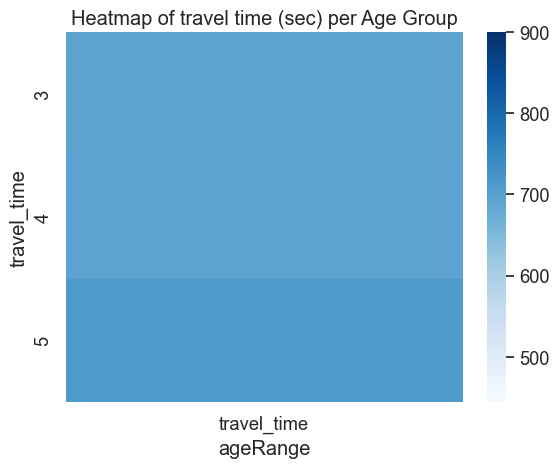

In [28]:
# Heatmap correlation between ageRange and travel_time
plot_heatmap_age(bike_full_df, 'ageRange', 'travel_time','Heatmap of travel time (sec) per Age Group', font_plot=20, min_value=444, max_value=900)

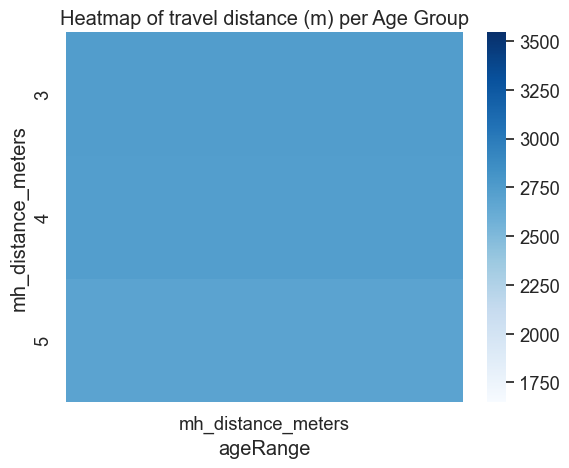

In [31]:
# Heatmap correlation between ageRange and travel_distance
plot_heatmap_age(bike_full_df, 'ageRange', 'mh_distance_meters','Heatmap of travel distance (m) per Age Group',font_plot=30,  min_value=1650, max_value=3544)

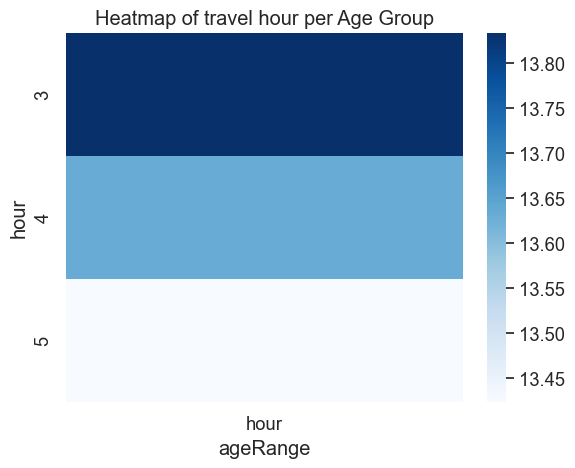

In [34]:
# Heatmap correlation between ageRange and travel_hour
plot_heatmap_age(bike_full_df, 'ageRange', 'hour','Heatmap of travel hour per Age Group')

## Information Gain 


In [98]:
print(bike_full_df.shape)
print(bike_full_df.dtypes)

(1524459, 43)
_id                           object
user_day_code                 object
idplug_base                    int64
user_type                      int64
idunplug_base                  int64
travel_time                    int64
idunplug_station               int64
ageRange                       int64
idplug_station                 int64
unplug_hourTime               object
zip_code                      object
temp_unplug_hourTime          object
year                           int64
month                          int64
day                            int64
hour                           int64
travel_time_min              float64
travel_revenue               float64
id_weather                     int64
80                           float64
81                           float64
82                           float64
83                           float64
86                           float64
87                           float64
88                           float64
89                      

In [97]:
bike_full_df['ageRange'].unique()

array([5, 4, 3], dtype=int64)

In [99]:
# Support function to calculate Entropy
def calculate_entropy(labels):
    _, counts = np.unique(labels, return_counts=True)
    probabilities = counts / len(labels)
    entropy = -np.sum(probabilities * np.log2(probabilities))
    return entropy

# Support function to calculate Information Gain
def information_gain(data, feature_column, target_column):
    # Step 1: Calculate entropy of the target variable before splitting
    entropy_before_split = calculate_entropy(data[target_column])
    
    # Step 2: Calculate weighted sum of entropies for each unique value in the feature
    weighted_entropy_after_split = 0
    for value in data[feature_column].unique():
        subset = data[data[feature_column] == value]
        entropy_after_split = calculate_entropy(subset[target_column])
        weight = len(subset) / len(data)
        weighted_entropy_after_split += weight * entropy_after_split
    
    # Step 3: Calculate information gain
    information_gain = entropy_before_split - weighted_entropy_after_split
    return information_gain

In [100]:
# Support function to be able to calculate 1 vs rest info gain
def replace_values_info_gain_ageRange(column,target_val=3):
    # Define a function to replace values
    def replace_value(val):
        if val == target_val:
            return 'Yes'
        else:
            return 'No'

    # Apply the function to each element in the column
    return column.apply(replace_value)

# Apply function
bike_full_df['IG_3']= replace_values_info_gain_ageRange(bike_full_df['ageRange'],target_val=3)
bike_full_df['IG_4']= replace_values_info_gain_ageRange(bike_full_df['ageRange'],target_val=4)
bike_full_df['IG_5']= replace_values_info_gain_ageRange(bike_full_df['ageRange'],target_val=5)


# Display the updated DataFrame
print(bike_full_df['IG_3'].unique())
print(bike_full_df['IG_4'].unique())
print(bike_full_df['IG_5'].unique())


['No' 'Yes']
['No' 'Yes']
['Yes' 'No']


Information Gain ageRange: 3
Inf. Gain Calculation Time ageRange 3: 934.1959917545319


,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,idplug_station,temp_unplug_hourTime,year,month,day,hour,travel_revenue,id_weather,81,82,83,86,87,88,89,week_day,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc,day_of_week,unplug_station_tot_bases,idunplug_latitude,idunplug_longitude,plug_station_tot_bases,idplug_latitude,idplug_longitude,mh_distance_meters,time_group,tot_trips_day
Information_Gain_3,0.0001971875,0.0000099226,0.0000588568,0.0011309746,0.0067118658,0.0068812058,0.0141114948,0.0000000000,0.0000494070,0.0000974806,0.0073226012,0.0000422205,0.0000000000,0.0010711588,0.0005487828,0.0011957110,0.0004864890,0.0001561883,0.0012642599,0.0002910148,0.0015348879,0.0016329879,0.0016339420,0.0016503910,0.0015348879,0.0003714982,0.0067118658,0.0067118658,0.0003728842,0.0068812058,0.0068812058,0.0847969186,0.0041487883,0.0006890984


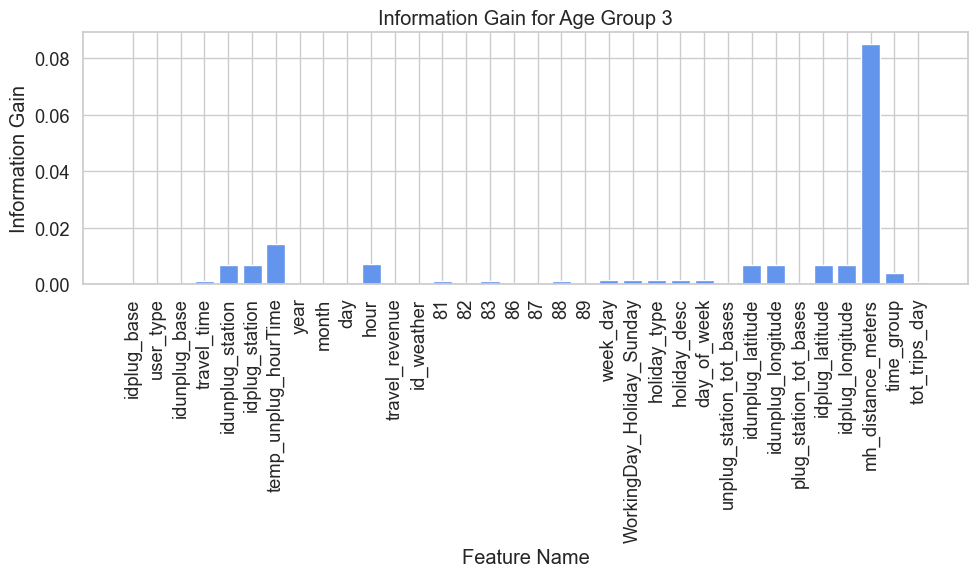

In [118]:
# Initialize a dictionary to store the results
results_3 = {}

# Information Gain for Age Group 3
print("Information Gain ageRange: 3")
# Measure IG calc time
start_time = time.time()
for col_name in [ 'idplug_base', 'user_type', 'idunplug_base', 'travel_time', 'idunplug_station', 'idplug_station', 'temp_unplug_hourTime', 'year', 'month', 'day', 'hour', 'travel_revenue', 'id_weather', '81', '82', '83', '86', '87', '88', '89', 'week_day', 'WorkingDay_Holiday_Sunday', 'holiday_type', 'holiday_desc', 'day_of_week', 'unplug_station_tot_bases', 'idunplug_latitude', 'idunplug_longitude', 'plug_station_tot_bases', 'idplug_latitude', 'idplug_longitude', 'mh_distance_meters', 'time_group', 'tot_trips_day']:
    ig_value = information_gain(bike_full_df, col_name, 'IG_3')
    results_3[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_3_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 3: {ig_3_time}")

# Convert the results dictionary into a DataFrame
info_gain_3_df = pd.DataFrame.from_dict(results_3, orient='index', columns=['Information_Gain_3'])
info_gain_3_df = info_gain_3_df.T

# Display the DataFrame
display(info_gain_3_df)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_3.keys(), results_3.values(), color='cornflowerblue')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain for Age Group 3')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Information Gain ageRange: 4
Inf. Gain Calculation Time ageRange 4: 862.4014208316803


,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,idplug_station,temp_unplug_hourTime,year,month,day,hour,travel_revenue,id_weather,81,82,83,86,87,88,89,week_day,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc,day_of_week,unplug_station_tot_bases,idunplug_latitude,idunplug_longitude,plug_station_tot_bases,idplug_latitude,idplug_longitude,mh_distance_meters,time_group,tot_trips_day
Information_Gain_4,0.0001432404,0.0000021835,0.0000512154,0.0013002991,0.0115405325,0.0106847087,0.0087981532,0.0000000000,0.0004553036,0.0000508445,0.0019201923,0.0000026644,0.0000000000,0.0005453626,0.0002141139,0.0006682356,0.0002139742,0.0000818844,0.0006139940,0.0000568358,0.0001653887,0.0001795102,0.0001799780,0.0001884190,0.0001653887,0.0004123232,0.0115405325,0.0115405325,0.0003556626,0.0106847087,0.0106847087,0.1533864293,0.0015418216,0.0002691255


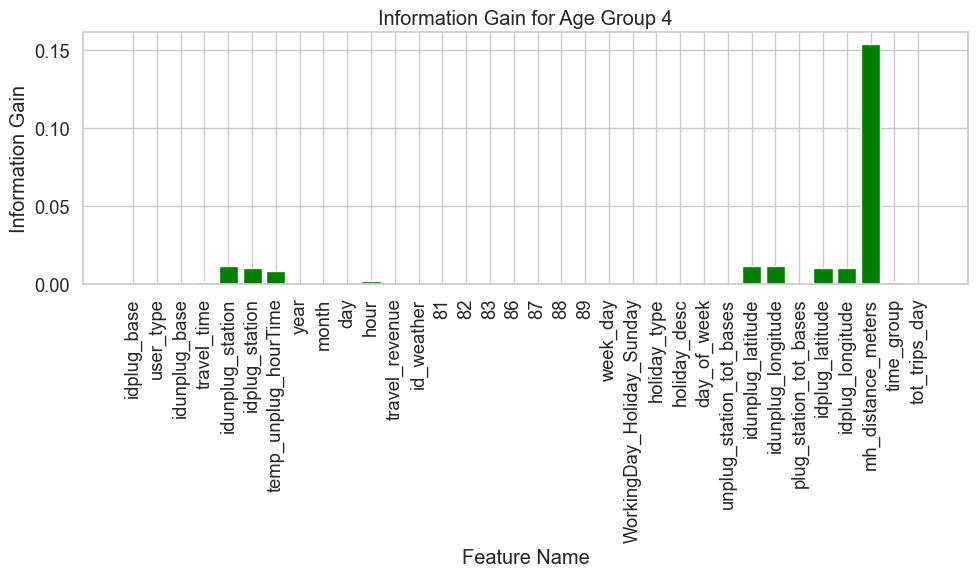

In [119]:
# Initialize a dictionary to store the results
results_4 = {}

# Information Gain for Age Group 4
print("Information Gain ageRange: 4")
# Measure IG calc time
start_time = time.time()
for col_name in [ 'idplug_base', 'user_type', 'idunplug_base', 'travel_time', 'idunplug_station', 'idplug_station', 'temp_unplug_hourTime', 'year', 'month', 'day', 'hour', 'travel_revenue', 'id_weather', '81', '82', '83', '86', '87', '88', '89', 'week_day', 'WorkingDay_Holiday_Sunday', 'holiday_type', 'holiday_desc', 'day_of_week', 'unplug_station_tot_bases', 'idunplug_latitude', 'idunplug_longitude', 'plug_station_tot_bases', 'idplug_latitude', 'idplug_longitude', 'mh_distance_meters', 'time_group', 'tot_trips_day']:
    ig_value = information_gain(bike_full_df, col_name, 'IG_4')
    results_4[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_4_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 4: {ig_4_time}")

# Convert the results dictionary into a DataFrame
info_gain_4_df = pd.DataFrame.from_dict(results_4, orient='index', columns=['Information_Gain_4'])
info_gain_4_df = info_gain_4_df.T

# Display the DataFrame
display(info_gain_4_df)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_4.keys(), results_4.values(), color='green')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain for Age Group 4')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Information Gain ageRange: 5
Inf. Gain Calculation Time ageRange 5: 881.7390584945679


,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,idplug_station,temp_unplug_hourTime,year,month,day,hour,travel_revenue,id_weather,81,82,83,86,87,88,89,week_day,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc,day_of_week,unplug_station_tot_bases,idunplug_latitude,idunplug_longitude,plug_station_tot_bases,idplug_latitude,idplug_longitude,mh_distance_meters,time_group,tot_trips_day
Information_Gain_5,0.0001272441,0.0000135603,0.0000534707,0.0014450333,0.0107979161,0.0099454577,0.0154748493,0.0000000000,0.0004247153,0.0001410184,0.0073272358,0.0000322462,0.0000000000,0.0013142075,0.0005857302,0.0014870152,0.0005129712,0.0001460777,0.0015039458,0.0002355259,0.0014323887,0.0015487526,0.0015491847,0.0015656169,0.0014323887,0.0003298733,0.0107979161,0.0107979161,0.0002557636,0.0099454577,0.0099454577,0.1514885931,0.0048544088,0.0004907158


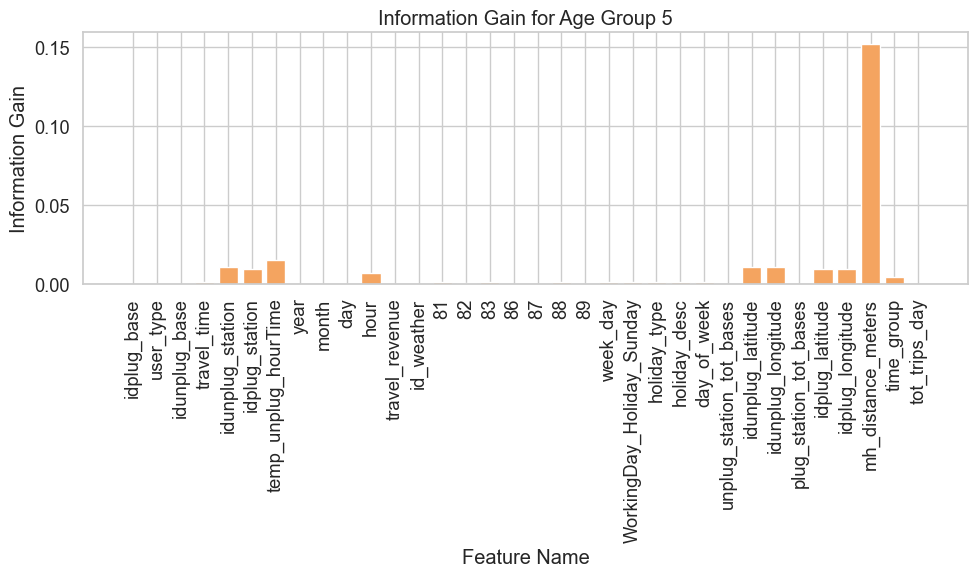

In [120]:
# Initialize a dictionary to store the results
results_5 = {}

# Information Gain for Age Group 5
print("Information Gain ageRange: 5")
# Measure IG calc time
start_time = time.time()
for col_name in [ 'idplug_base', 'user_type', 'idunplug_base', 'travel_time', 'idunplug_station', 'idplug_station', 'temp_unplug_hourTime', 'year', 'month', 'day', 'hour', 'travel_revenue', 'id_weather', '81', '82', '83', '86', '87', '88', '89', 'week_day', 'WorkingDay_Holiday_Sunday', 'holiday_type', 'holiday_desc', 'day_of_week', 'unplug_station_tot_bases', 'idunplug_latitude', 'idunplug_longitude', 'plug_station_tot_bases', 'idplug_latitude', 'idplug_longitude', 'mh_distance_meters', 'time_group', 'tot_trips_day']:
    ig_value = information_gain(bike_full_df, col_name, 'IG_5')
    results_5[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_5_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 5: {ig_5_time}")

# Convert the results dictionary into a DataFrame
info_gain_5_df = pd.DataFrame.from_dict(results_5, orient='index', columns=['Information_Gain_5'])
info_gain_5_df = info_gain_5_df.T

# Display the DataFrame
display(info_gain_5_df)

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_5.keys(), results_5.values(), color='sandybrown')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain for Age Group 5')
plt.xticks(rotation=90)
# # Add values on top of each bar
# for bar in bars:
#     height = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2, height, '{:.7f}'.format(height),
#              ha='center', va='bottom')

plt.tight_layout()
plt.show()

### Information Gain w/o manhattan distance 

In [101]:
features_info_gain_no_distance = ['idplug_base', 
'user_type', 
'idunplug_base', 
'idunplug_station',
'idunplug_latitude', 
'idunplug_longitude',
'unplug_station_tot_bases',  
'idplug_station',
'idplug_latitude', 
'idplug_longitude',
'plug_station_tot_bases',
'travel_time', 
'travel_revenue', 
'tot_trips_day',
'year', 
'month', 
'day', 
'hour',
'time_group',
'81', 
'82', 
'83', 
'86', 
'87', 
'88', 
'89', 
'week_day',
'day_of_week', 
'WorkingDay_Holiday_Sunday', 
'holiday_type', 
'holiday_desc'  
]

Information Gain ageRange: 3
Inf. Gain Calculation Time ageRange 3: 91.36612486839294


,idplug_base,user_type,idunplug_base,idunplug_station,idunplug_latitude,idunplug_longitude,unplug_station_tot_bases,idplug_station,idplug_latitude,idplug_longitude,plug_station_tot_bases,travel_time,travel_revenue,tot_trips_day,year,month,day,hour,time_group,81,82,83,86,87,88,89,week_day,day_of_week,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc
Information_Gain_3,0.0001971875,0.0000099226,0.0000588568,0.0067118658,0.0067118658,0.0067118658,0.0003714982,0.0068812058,0.0068812058,0.0068812058,0.0003728842,0.0011309746,0.0000422205,0.0006890984,0.0000000000,0.0000494070,0.0000974806,0.0073226012,0.0041487883,0.0010711588,0.0005487828,0.0011957110,0.0004864890,0.0001561883,0.0012642599,0.0002910148,0.0015348879,0.0015348879,0.0016329879,0.0016339420,0.0016503910


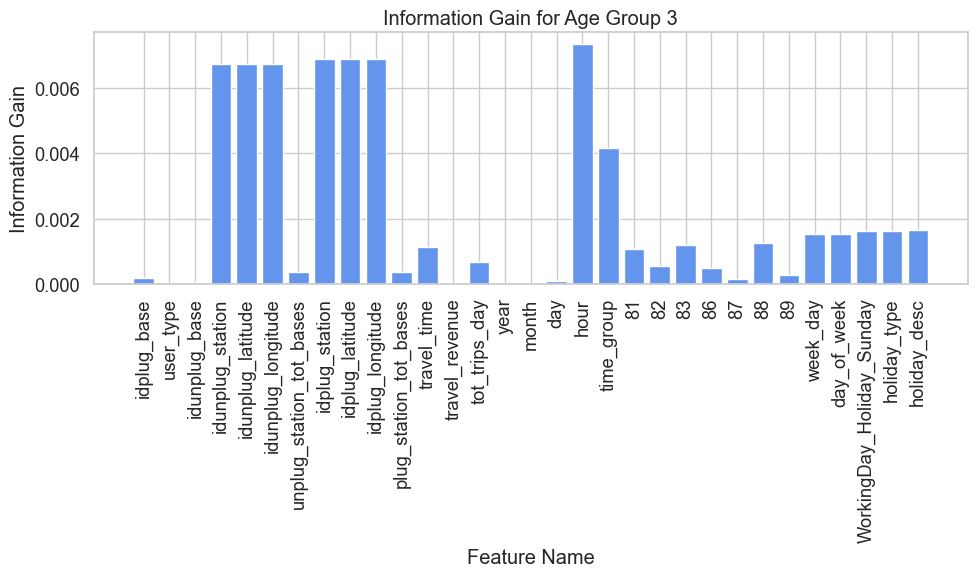

In [102]:
# Initialize a dictionary to store the results
results_3 = {}

# Information Gain for Age Group 3
print("Information Gain ageRange: 3")
# Measure IG calc time
start_time = time.time()
for col_name in features_info_gain_no_distance:
    ig_value = information_gain(bike_full_df, col_name, 'IG_3')
    results_3[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_3_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 3: {ig_3_time}")

# Convert the results dictionary into a DataFrame
info_gain_3_df = pd.DataFrame.from_dict(results_3, orient='index', columns=['Information_Gain_3'])
info_gain_3_df = info_gain_3_df.T

# Display the DataFrame
display(info_gain_3_df)

# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 14})

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_3.keys(), results_3.values(), color='cornflowerblue')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain for Age Group 3')
plt.xticks(rotation=90)


plt.tight_layout()
plt.savefig('info_gain_age_3.pdf', format='pdf', bbox_inches='tight')
plt.show()

Information Gain ageRange: 4
Inf. Gain Calculation Time ageRange 4: 98.32048535346985


,idplug_base,user_type,idunplug_base,idunplug_station,idunplug_latitude,idunplug_longitude,unplug_station_tot_bases,idplug_station,idplug_latitude,idplug_longitude,plug_station_tot_bases,travel_time,travel_revenue,tot_trips_day,year,month,day,hour,time_group,81,82,83,86,87,88,89,week_day,day_of_week,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc
Information_Gain_4,0.0001432404,0.0000021835,0.0000512154,0.0115405325,0.0115405325,0.0115405325,0.0004123232,0.0106847087,0.0106847087,0.0106847087,0.0003556626,0.0013002991,0.0000026644,0.0002691255,0.0000000000,0.0004553036,0.0000508445,0.0019201923,0.0015418216,0.0005453626,0.0002141139,0.0006682356,0.0002139742,0.0000818844,0.0006139940,0.0000568358,0.0001653887,0.0001653887,0.0001795102,0.0001799780,0.0001884190


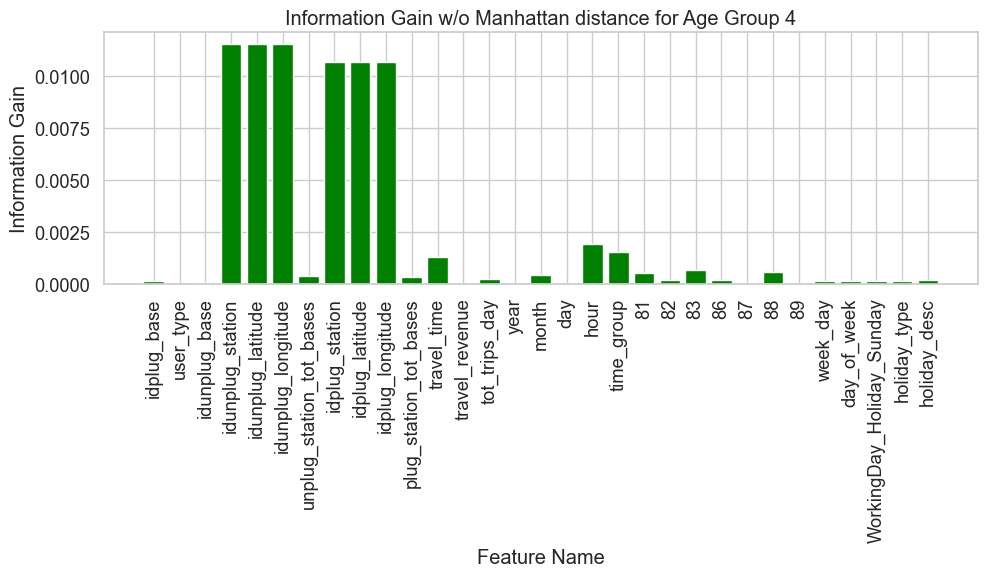

In [103]:
# Initialize a dictionary to store the results
results_4 = {}

# Information Gain for Age Group 4
print("Information Gain ageRange: 4")
# Measure IG calc time
start_time = time.time()
for col_name in features_info_gain_no_distance:
    ig_value = information_gain(bike_full_df, col_name, 'IG_4')
    results_4[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_4_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 4: {ig_4_time}")

# Convert the results dictionary into a DataFrame
info_gain_4_df = pd.DataFrame.from_dict(results_4, orient='index', columns=['Information_Gain_4'])
info_gain_4_df = info_gain_4_df.T

# Display the DataFrame
display(info_gain_4_df)

# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 14})

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_4.keys(), results_4.values(), color='green')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain w/o Manhattan distance for Age Group 4')
plt.xticks(rotation=90)


plt.tight_layout()
plt.savefig('info_gain_age_4.pdf', format='pdf', bbox_inches='tight')
plt.show()

Information Gain ageRange: 5
Inf. Gain Calculation Time ageRange 5: 98.35468101501465


,idplug_base,user_type,idunplug_base,idunplug_station,idunplug_latitude,idunplug_longitude,unplug_station_tot_bases,idplug_station,idplug_latitude,idplug_longitude,plug_station_tot_bases,travel_time,travel_revenue,tot_trips_day,year,month,day,hour,time_group,81,82,83,86,87,88,89,week_day,day_of_week,WorkingDay_Holiday_Sunday,holiday_type,holiday_desc
Information_Gain_5,0.0001272441,0.0000135603,0.0000534707,0.0107979161,0.0107979161,0.0107979161,0.0003298733,0.0099454577,0.0099454577,0.0099454577,0.0002557636,0.0014450333,0.0000322462,0.0004907158,0.0000000000,0.0004247153,0.0001410184,0.0073272358,0.0048544088,0.0013142075,0.0005857302,0.0014870152,0.0005129712,0.0001460777,0.0015039458,0.0002355259,0.0014323887,0.0014323887,0.0015487526,0.0015491847,0.0015656169


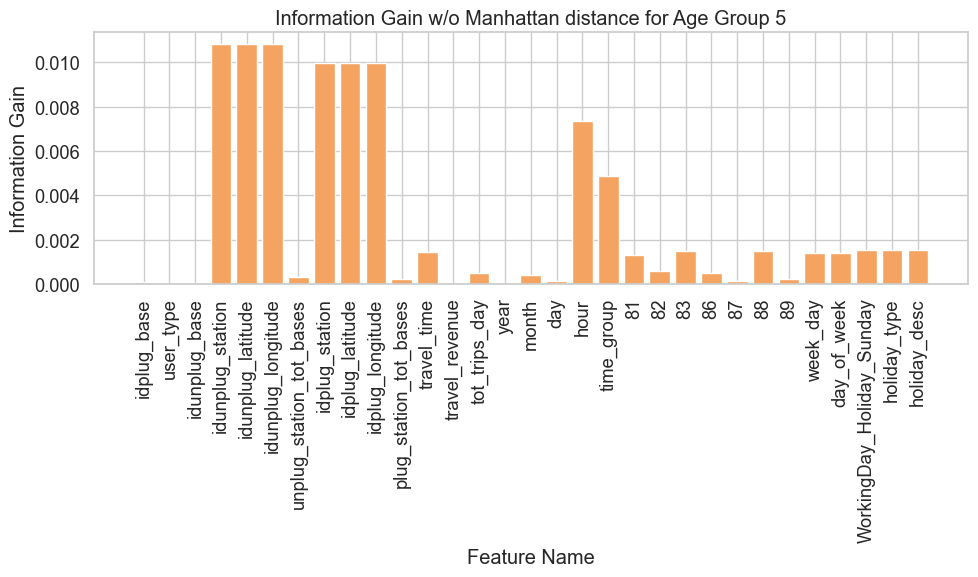

In [104]:
# Initialize a dictionary to store the results
results_5 = {}

# Information Gain for Age Group 5
print("Information Gain ageRange: 5")
# Measure IG calc time
start_time = time.time()
for col_name in features_info_gain_no_distance:
    ig_value = information_gain(bike_full_df, col_name, 'IG_5')
    results_5[col_name] = ig_value
    #print(f"Information Gain {col_name}: {ig_value}")

end_time = time.time()
ig_5_time = end_time - start_time
print(f"Inf. Gain Calculation Time ageRange 5: {ig_5_time}")

# Convert the results dictionary into a DataFrame
info_gain_5_df = pd.DataFrame.from_dict(results_5, orient='index', columns=['Information_Gain_5'])
info_gain_5_df = info_gain_5_df.T

# Display the DataFrame
display(info_gain_5_df)

# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 14})

# Plot the results as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(results_5.keys(), results_5.values(), color='sandybrown')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain')
plt.title('Information Gain w/o Manhattan distance for Age Group 5')
plt.xticks(rotation=90)


plt.tight_layout()
plt.savefig('info_gain_age_5.pdf', format='pdf', bbox_inches='tight')
plt.show()

## t-SNE Correlation

t-SNE done on representative subset from original dataset.

In [105]:
# Create representative subset dataset to be able to plot t-SNE:
bike_subset_tsne_df, __ = train_test_split(bike_full_df, stratify=bike_full_df["ageRange"],test_size=0.95, random_state=123)

In [106]:
bike_subset_tsne_df.shape

(76222, 46)

In [107]:
selected_columns_tsne = [
    'travel_time', 
    'idunplug_latitude',
    'idunplug_longitude',
    'unplug_station_tot_bases',
    'idplug_latitude',
    'idplug_longitude',
    'plug_station_tot_bases',
    'month',
    'day', 
    'hour',
    'travel_revenue',
    'tot_trips_day',
    'mh_distance_meters', 
    '81', 
    '82', 
    '83', 
    '86', 
    '87', 
    '88', 
    '89'   
       ]

In [108]:
filter_bike_subset_tsne_df = bike_subset_tsne_df[selected_columns_tsne]
print(filter_bike_subset_tsne_df.shape)
filter_bike_subset_tsne_df.dtypes

(76222, 20)


travel_time                   int64
idunplug_latitude           float64
idunplug_longitude          float64
unplug_station_tot_bases      int64
idplug_latitude             float64
idplug_longitude            float64
plug_station_tot_bases        int64
month                         int64
day                           int64
hour                          int64
travel_revenue              float64
tot_trips_day                 int64
mh_distance_meters          float64
81                          float64
82                          float64
83                          float64
86                          float64
87                          float64
88                          float64
89                          float64
dtype: object

In [109]:
rand_state = 123
tsne = TSNE(n_components=2, random_state=rand_state, learning_rate=50)

tsne_features = tsne.fit_transform(filter_bike_subset_tsne_df)

In [110]:
tsne_features[1:4,:]

array([[-20.393286 ,  -6.1643815],
       [ -4.5476346,   7.7538037],
       [-12.849978 ,  -6.3884406]], dtype=float32)

In [111]:
bike_subset_tsne_df['tsne_x'] = tsne_features[:,0]
bike_subset_tsne_df['tsne_y'] = tsne_features[:,1]

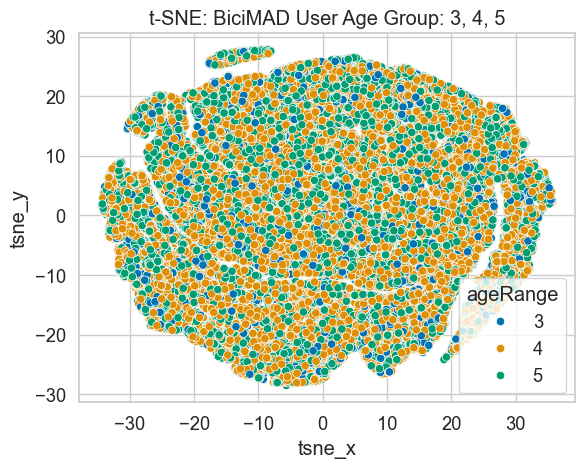

In [112]:
# Define color palette
custom_palette = sns.color_palette("colorblind")

# Set font size to be further exported for the paper
plt.rcParams.update({'font.size': 14})

sns.scatterplot(x='tsne_x',y='tsne_y',hue='ageRange',data=bike_subset_tsne_df,palette=custom_palette)
plt.title('t-SNE: BiciMAD User Age Group: 3, 4, 5')

plt.savefig('t-sne_age_3-4-5.pdf', format='pdf', bbox_inches='tight')
plt.show()